# Homework 5 (Regression Project)

# COSC 3337 - Dr. Rizk

## About the Data

The dataset has the following attributes related **Seoul Bike Sharing Demand** dataset:

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

## Problem Statement

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. 

 * The goal of this regression project is to predict the <u>**bike count at each hour**</u> for the stable supply of rental bikes at Seoul.
 
The regression models that will be explored with this dataset are:

 * Linear Regression
 * Ridge/Lasso Regression
 * Random Forest Regression
 * KNN Regressor

## General Outline

 * Exploratory Data Analysis (EDA)
     * Before modeling, it is essential to explore the dataset by evaluating the distribution of the data, understanding relationships between quality vs. other explanatory variables, and addressing issues like collinearity.  
     
 * Data Cleaning
     * The data cleaning process implies applying various techniques to address issues discovered during the exploration phase.  
 * Regression Modeling
     * 1st. Implement the first iteration of the regression model chosen
     * 2nd. Hypertune regression model parameters (if hypertunable)
     * 3rd. Cross-validate

## Table of Contents

In [1]:
#importing libraries for this lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.metrics import mean_squared_error

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [4]:
#importing the dataset into a pandas DataFrame from my own computer
bike_df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
bike_df.head()


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
#inspecting the dataset a different way, no missing values
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Based on the info summary: 
 * There are 8760 entries
 * There are 8760 non-null entires in each feature/column
 * No missing values
 * There is a mix of numerical (e.g. int64 & float64) and categorical (e.g. object)

In [6]:
#inspecing the data for any missing values
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Based on the describe summary:
 * It is evident that the dataset should be scaled either by RobustScaler or MinMaxScaler. In general, MinMaxScaler is preferred if most of the features do not follow a normal distribution. However, RobustScaler follow the same characteristics but it can minimize the weight of outliers. 

It is clear that the:
 * <u>**Response Variable**</u> = Rented Bike Count at each hour
 
 
 * <u>**Explanatory Variables**</u> = Date, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day

But before moving onto visual analysis, it is important to create dummy features for some of the categorical features in this dataset which are Seasons and Holiday.

 * <u>Seasons</u> is going to be split into dummy columns for each season
 * <u>Holiday</u> is going to be split in to 2 dummy columns
 * <u>Date</u> is going to be dropped
 * <u>Functioning Day</u> is also going to be dropped
 
 
The reason that date is going to be omitted from the regression analysis is because the measure of bike count required at each hour will focus by seasons. However, analysis can be extended to pinpoint which specific months and day of the week in a given season when bike demand is high. In addition to dropping date, we will be dropping functioning day as there is not enough information on what that feature is.

In [7]:
bike_df_encoded = bike_df.copy()

bike_df_encoded = pd.get_dummies(bike_df_encoded, columns = ['Seasons'])
bike_df_encoded = pd.get_dummies(bike_df_encoded, columns = ['Holiday'])

In [8]:
bike_df_encoded = bike_df_encoded.drop('Date', axis = 1)
bike_df_encoded = bike_df_encoded.drop('Functioning Day', axis = 1)

In [9]:
bike_df_encoded.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons_Autumn  Seasons_Spring  \
0           0.0            0.0               0               0   
1           0.0            0.0               0               0   
2           0.0            0.0               0               0   
3           0.0            0.0               0               0   
4           0.0            0.0               0               0   

   Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  
0               0               1                0                   1  
1               0               1                0                   1  
2               0               1                0                   1  
3               0               1                0                   1  
4               0               1                0                   1

In [10]:
bike_df_og = bike_df.copy()

bike_df = bike_df_encoded.copy()
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons_Autumn  Seasons_Spring  \
0           0.0            0.0               0               0   
1           0.0            0.0               0               0   
2           0.0            0.0               0               0   
3           0.0            0.0               0               0   
4           0.0            0.0               0               0   

   Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  
0               0               1                0                   1  
1               0               1                0                   1  
2               0               1                0                   1  
3               0               1                0                   1  
4               0               1                0                   1

In [11]:
categoricals = ['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday']
numericals = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
              'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

ogCategoricals = ['Seasons', 'Holiday', 'Functioning Day']

In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons_Autumn             8760 non-null   uint8  
 11  Seasons_Spring             8760 non-null   uint8  
 12  Seasons_Summer             8760 non-null   uint8  
 13  Seasons_Winter             8760 non-null   uint8

The steps depicted above save the original dataframe called **bike_df_og** and a new modified copy called **bike_df**. It is important to keep the original because there are more information that can be gained from the original dataset when doing the visual analysis

## Part 1: Visual Analysis (Numerical)

<Figure size 1500x1500 with 0 Axes>

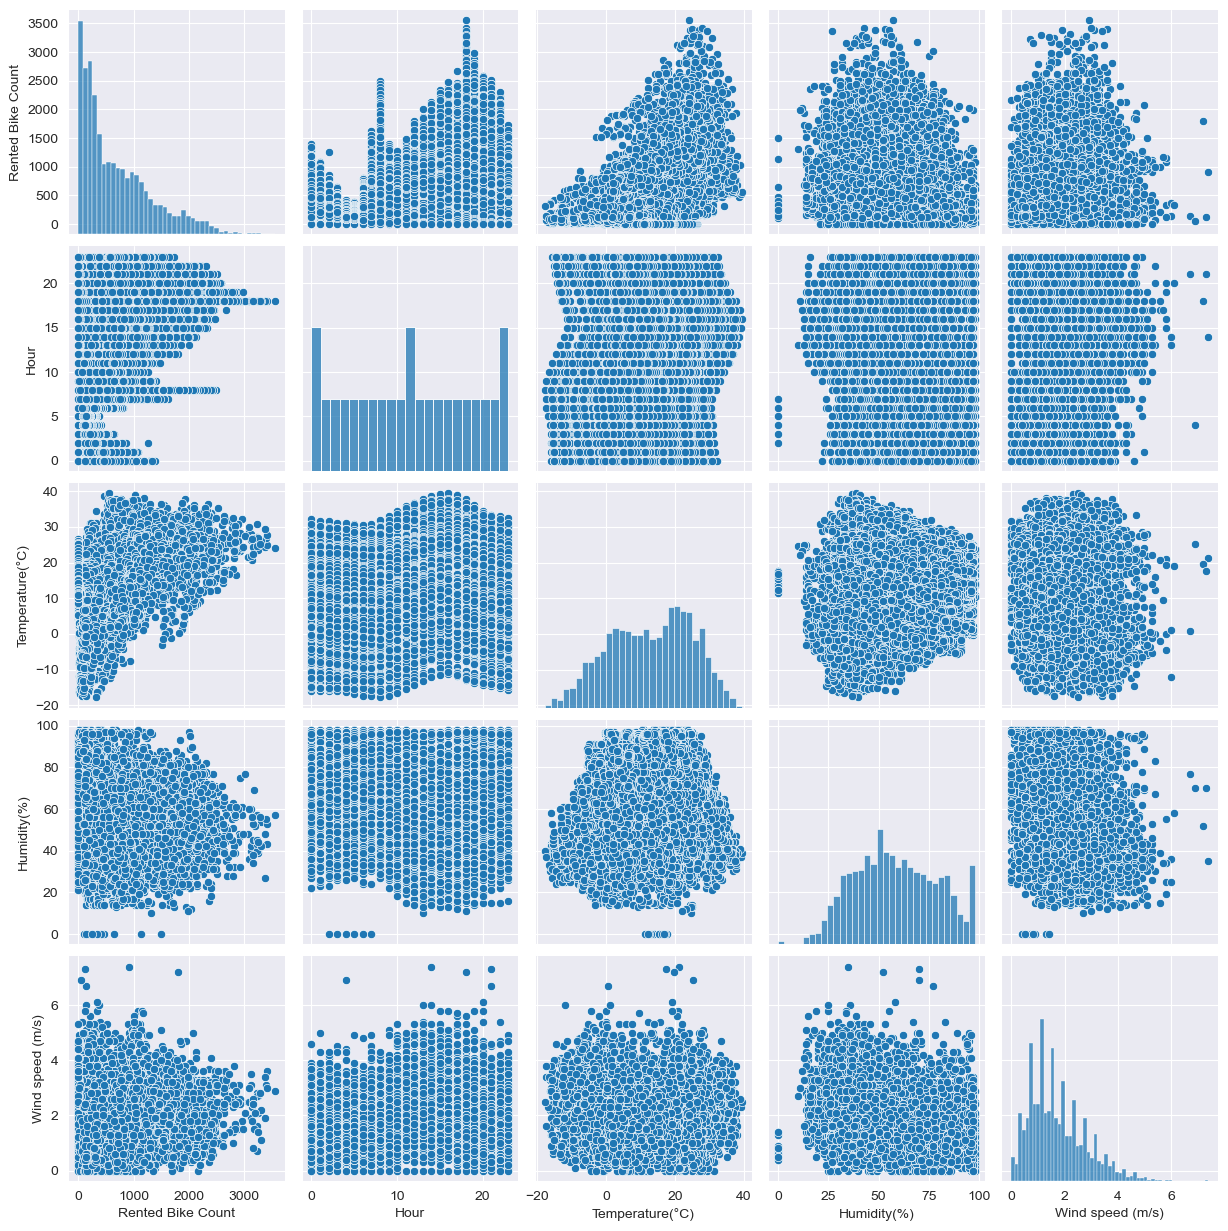

In [13]:
plt.figure(figsize=(15, 15))
sns.pairplot(bike_df_og[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']])
plt.show()

<Figure size 1500x1500 with 0 Axes>

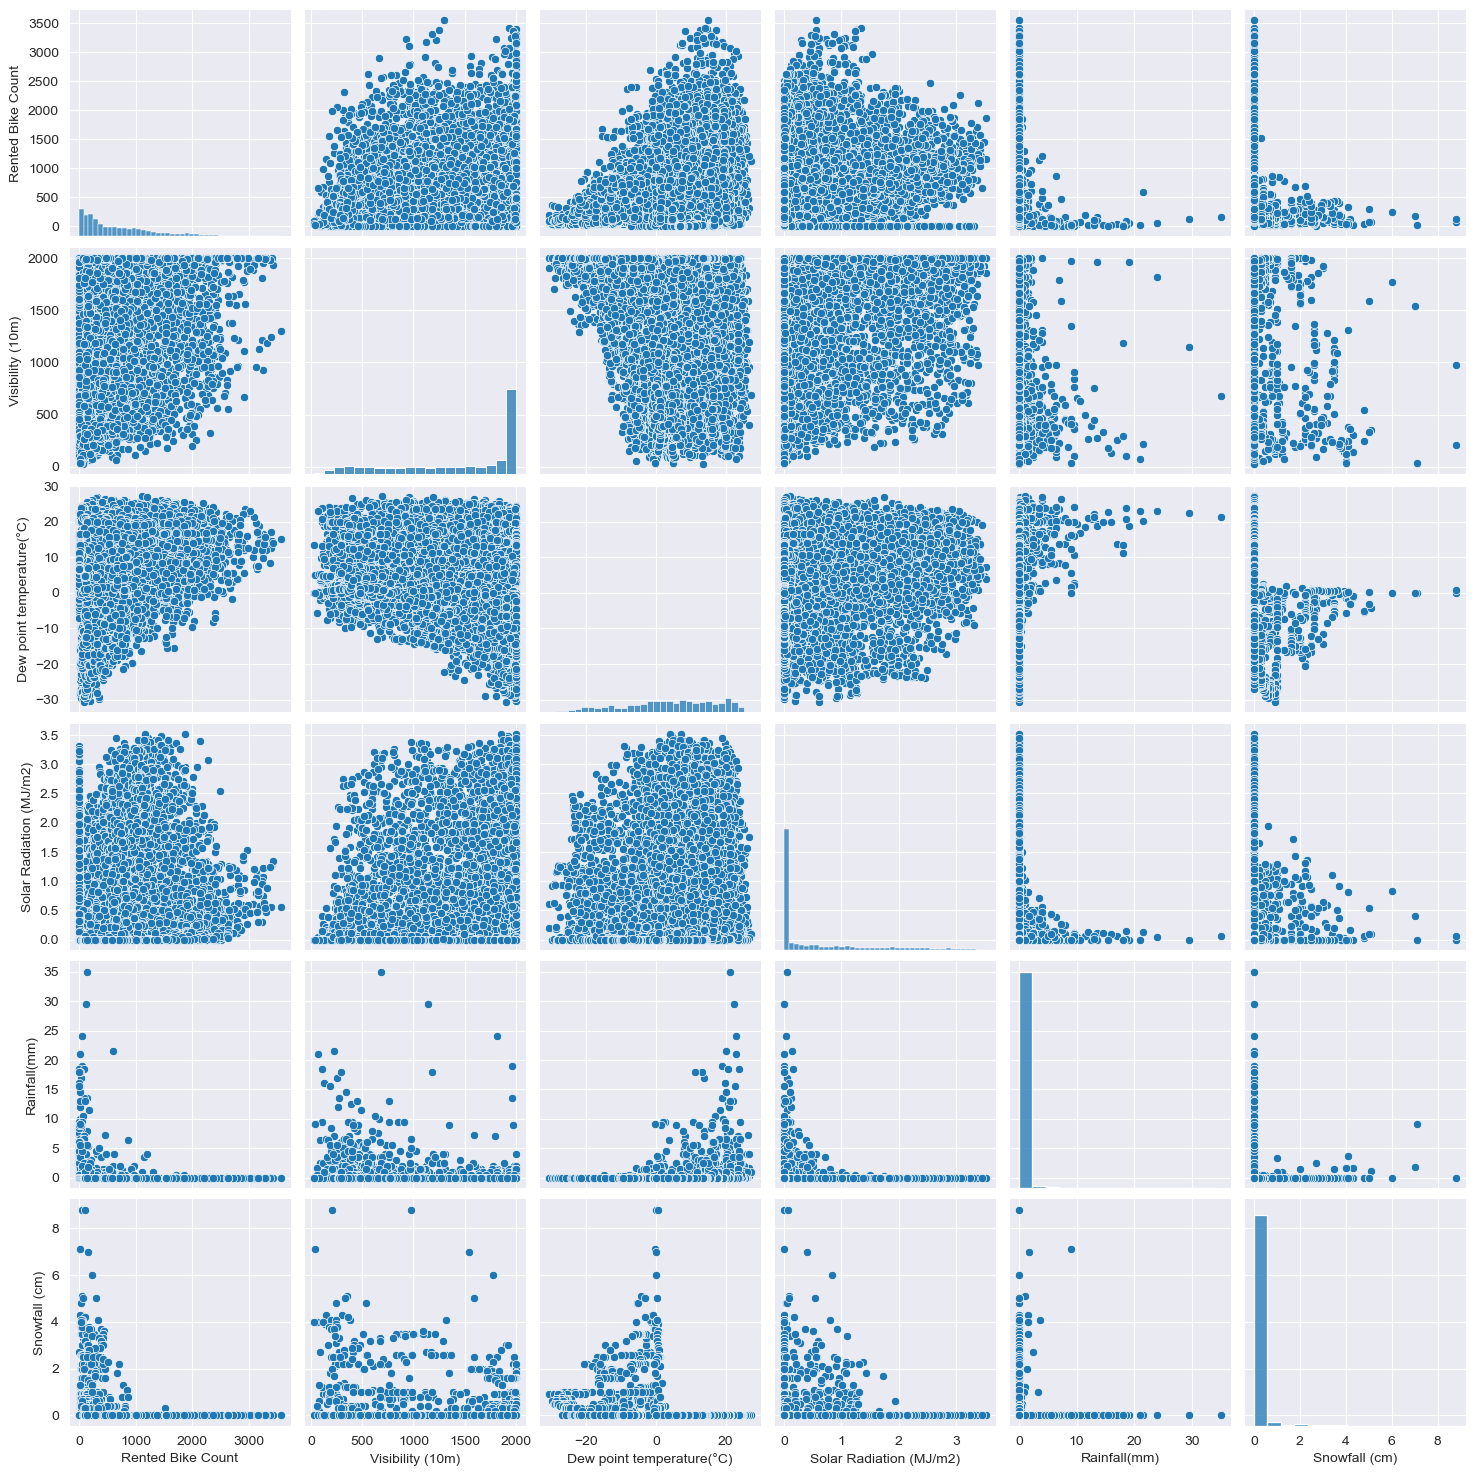

In [14]:
plt.figure(figsize=(15, 15))
sns.pairplot(bike_df_og[['Rented Bike Count', 'Visibility (10m)',
                      'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']])
plt.show()

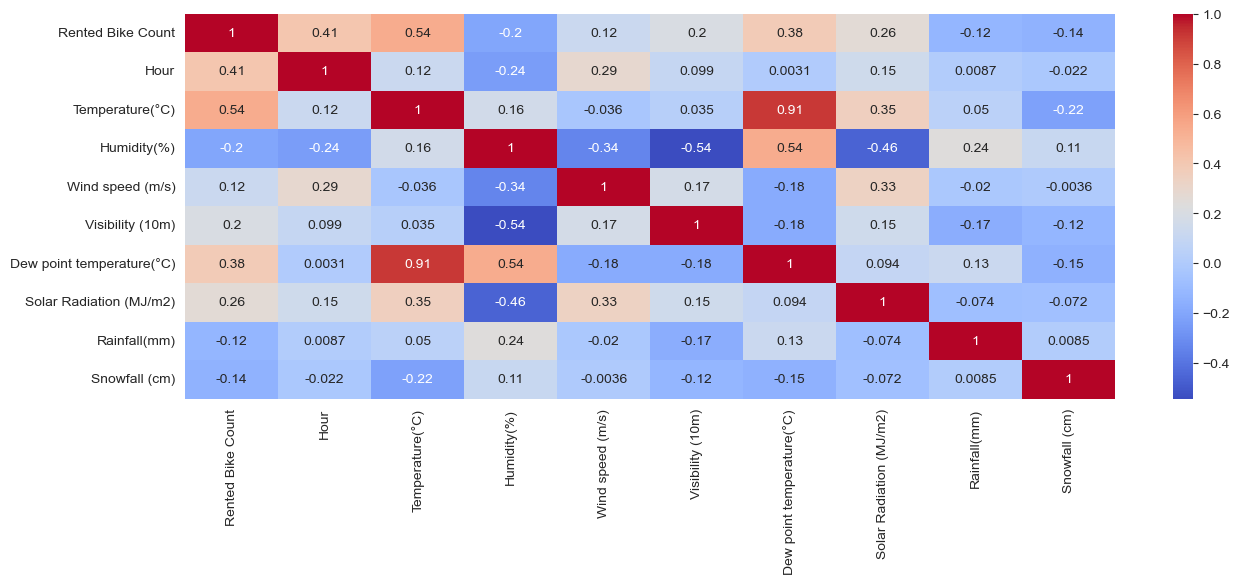

In [15]:
sns.heatmap(bike_df_og.corr(), cmap= "coolwarm", annot = True)
plt.show()

It is clear that Temperature(°C) and Dew point temperature(°C) poses a **collinearity issue**. With that in mind, it is likely Dew point will be removed from the dataframe over Temperature because it has a lower correlation coefficient with Rented Bike Count than Temperature.

Heatmap and Pairplot Evaluation:
 * Strong Postive Correlation with Rented Bike Count
     * **Hour**
     * **Temperature(°C)**
 * Positive Correlation with Rented Bike Count
     * **Wind Speed (m/s)**
     * **Visibility (10m)**
     * **Solar Radiation (MJ/m2)**
 * Negative Correlation with Rented Bike Count
     * **Humidity (%)**
     * **Rainfall (mm)**
     * **Snowfall (cm)**
     
These findings are very intuitive considering that people typically don't like to go outside especially when there is bad weather like humidity, rainfall, and snowfall.

In [16]:
bike_df = bike_df.drop('Dew point temperature(°C)', axis = 1)

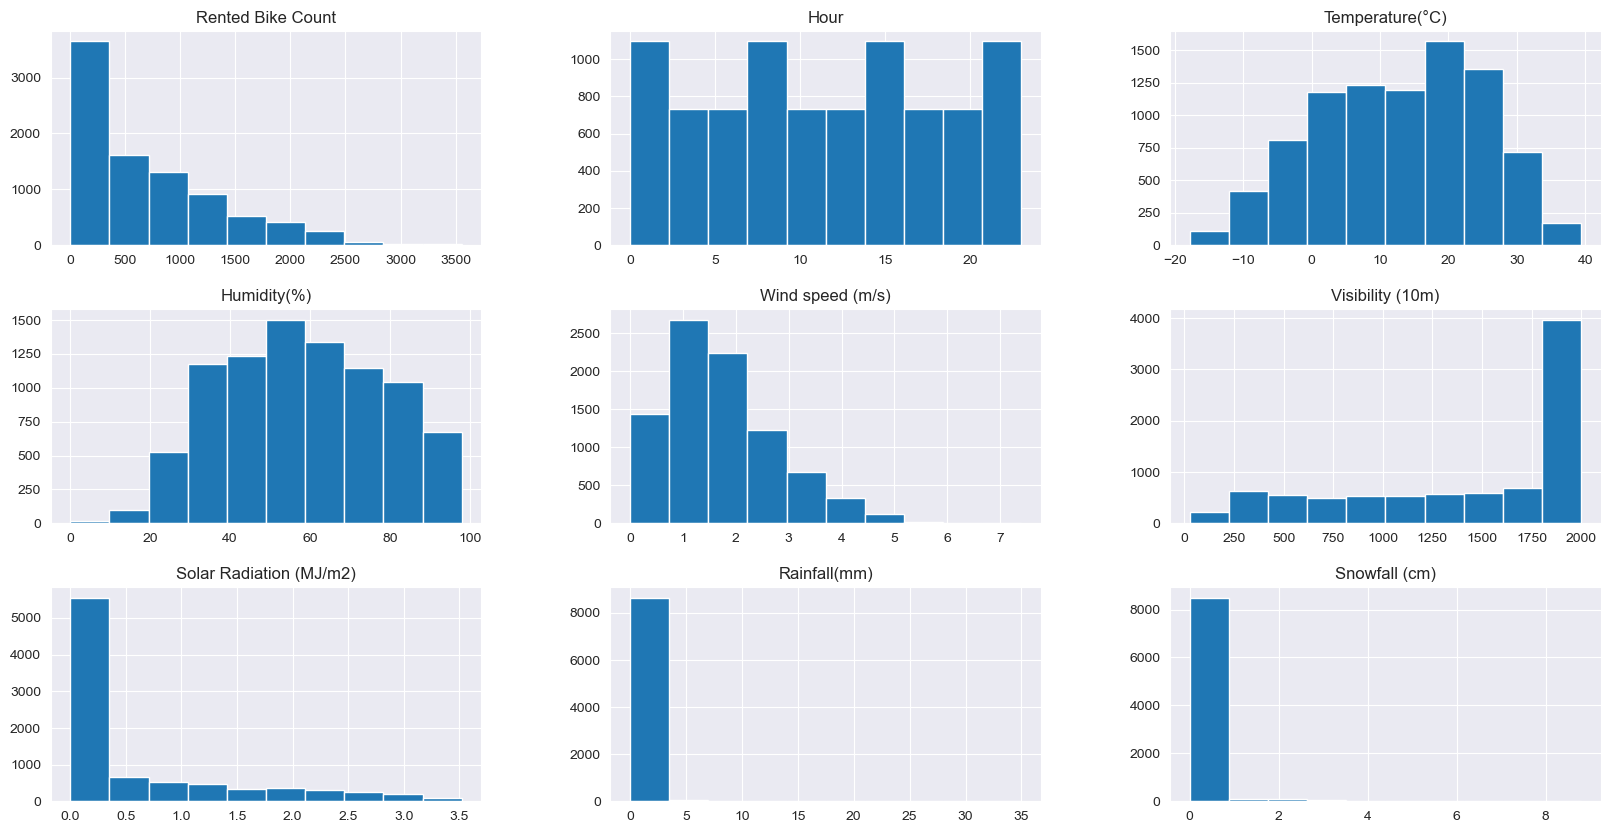

In [17]:
numericals.remove('Dew point temperature(°C)')
bike_df_og[numericals].hist(figsize = (20,10))
plt.show()

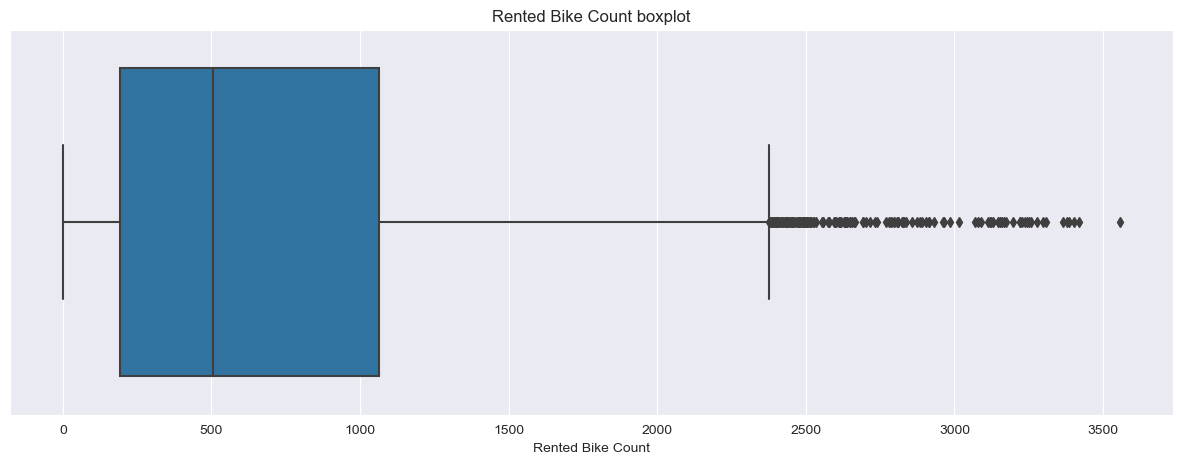

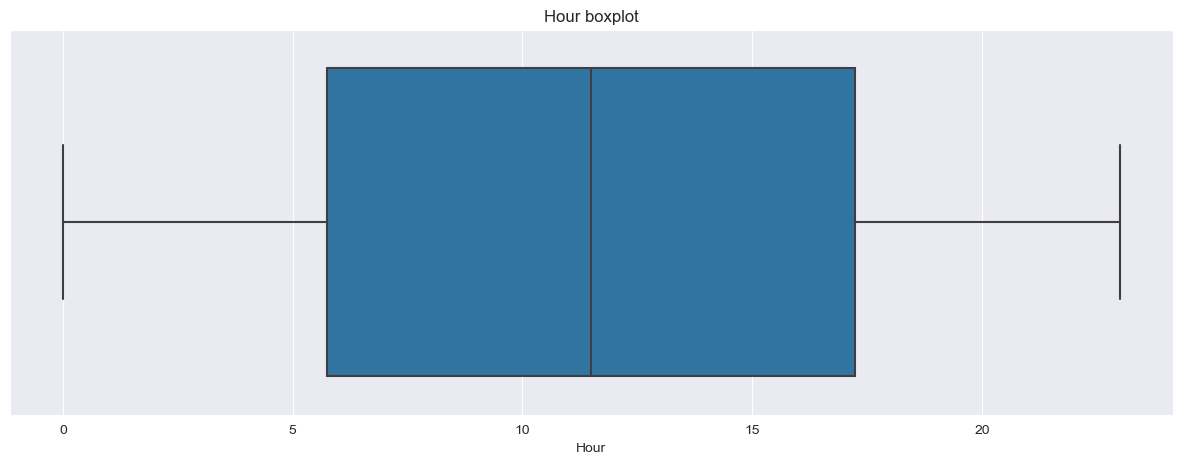

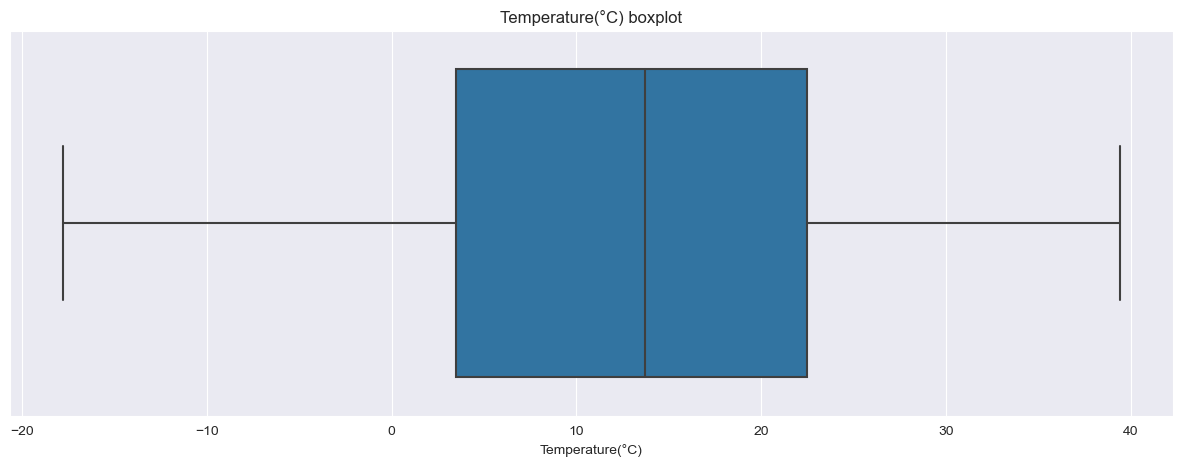

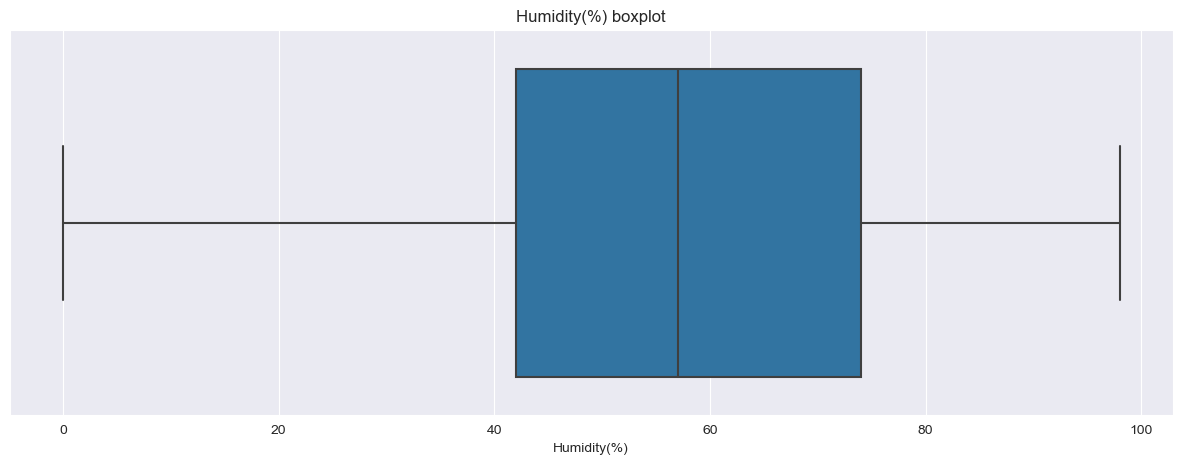

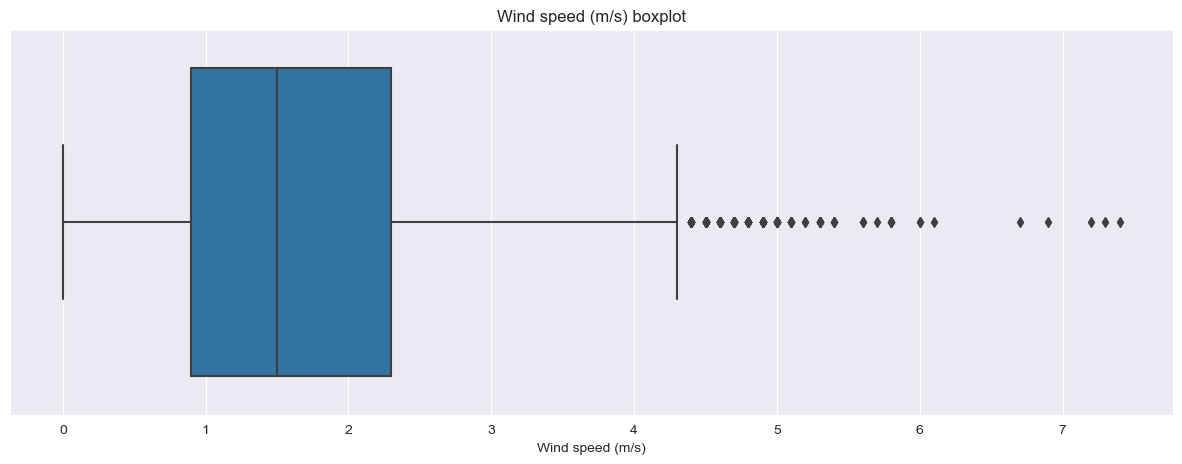

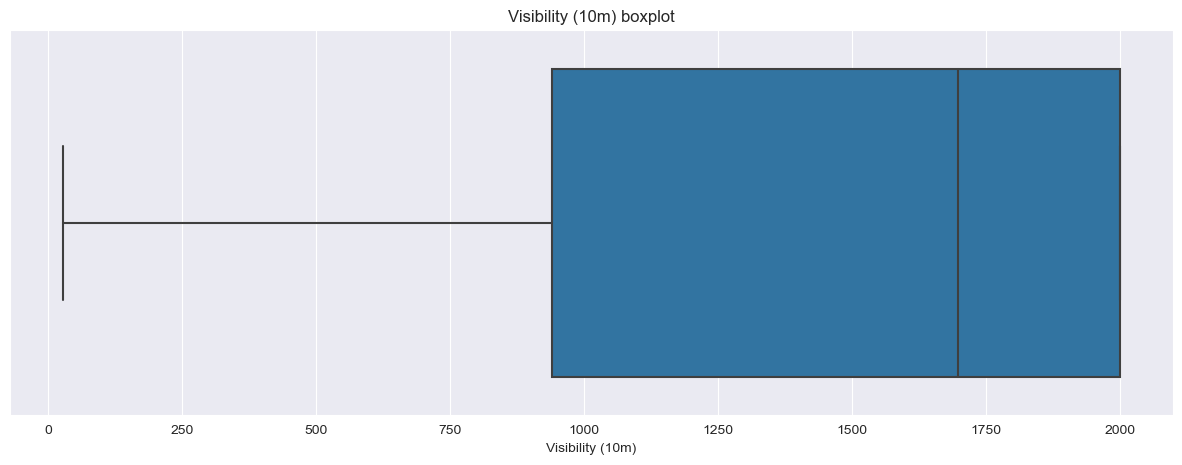

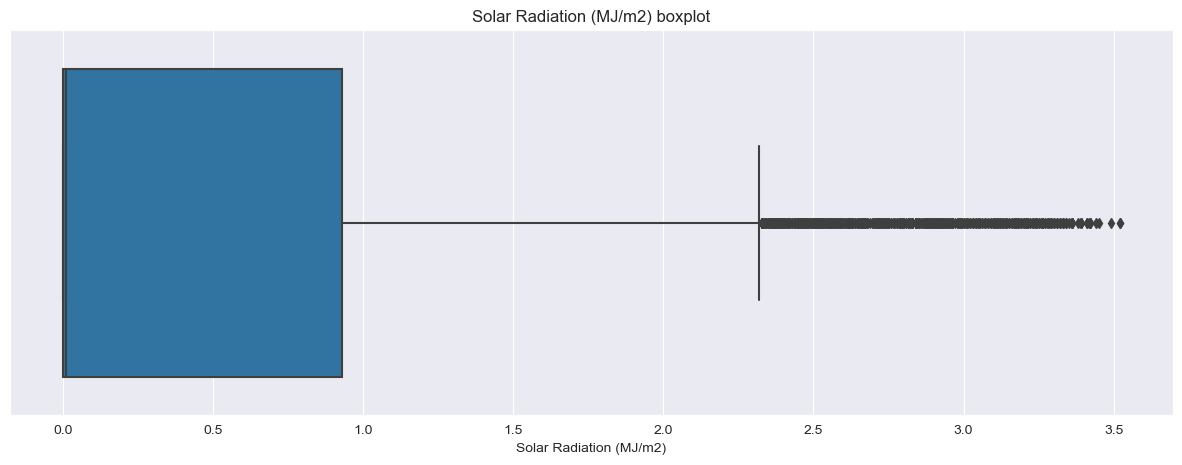

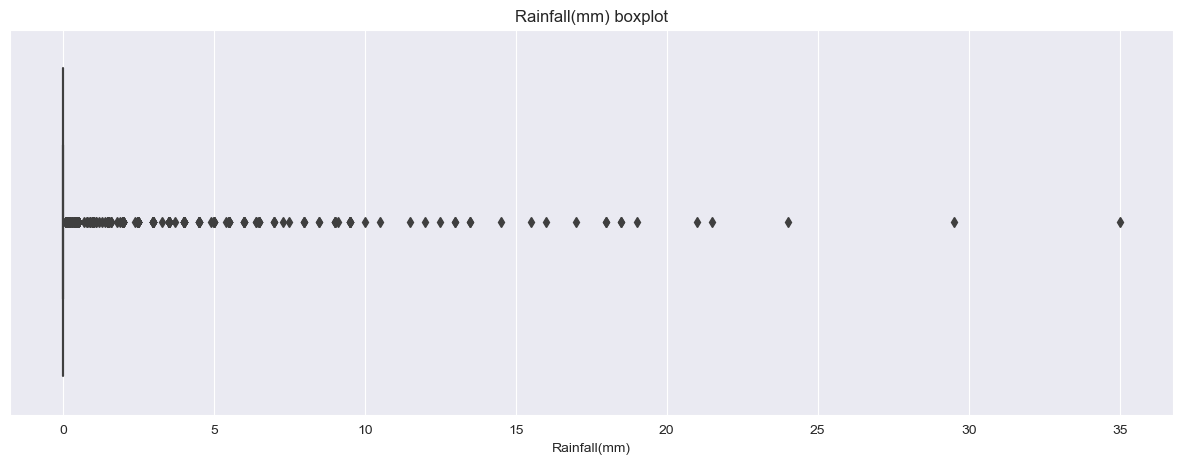

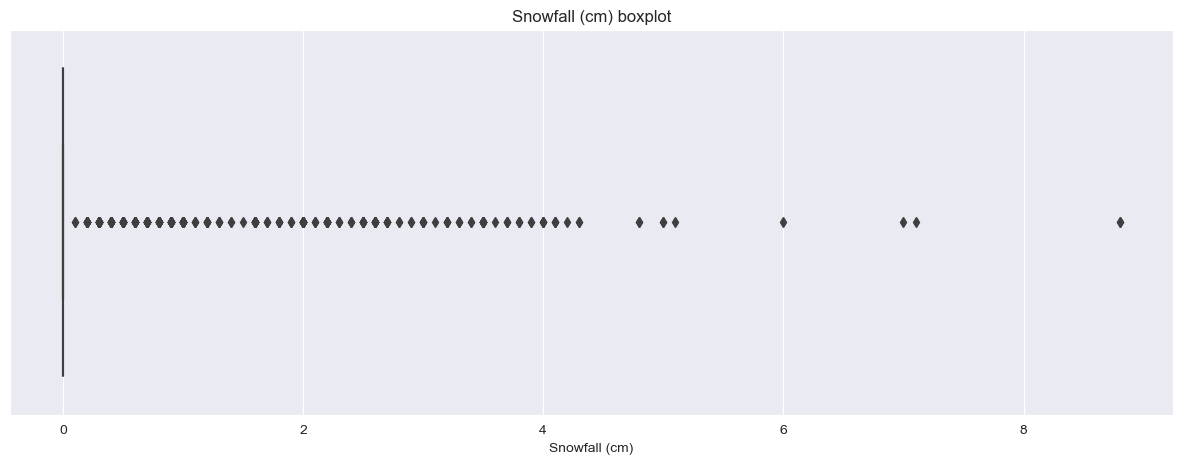

In [18]:
for i, explanatoryVariables in enumerate(numericals, 1):
    sns.boxplot(x = explanatoryVariables, data = bike_df_og).set(title=f'{explanatoryVariables} boxplot')
    plt.show()

In [19]:
skewness = bike_df_og.skew()
print("Numerical features skewness: ")
print(skewness)

Numerical features skewness: 
Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
dtype: float64


Explanatory variables disribution based on the histogram, boxplots, and skew scores:
 * Rented bike count has a right skewed distribution with outliers
 * Hour has a normal distribution
 * Temperature and Humidity has a somewhat normal distribution
 * Wind speed has a extreme right skewed distribution with outliers
 * Visibility has a extreme left skewed distribution
 * Solar Radiation has a right skewed distribution
 * Rainfall and snowfall has a somewhat uniform distribution with outliers
 
Another possible that can be done is remove the outliers in the dataframe into a separate df, then train with one df without outliers and the other with only the outliers??


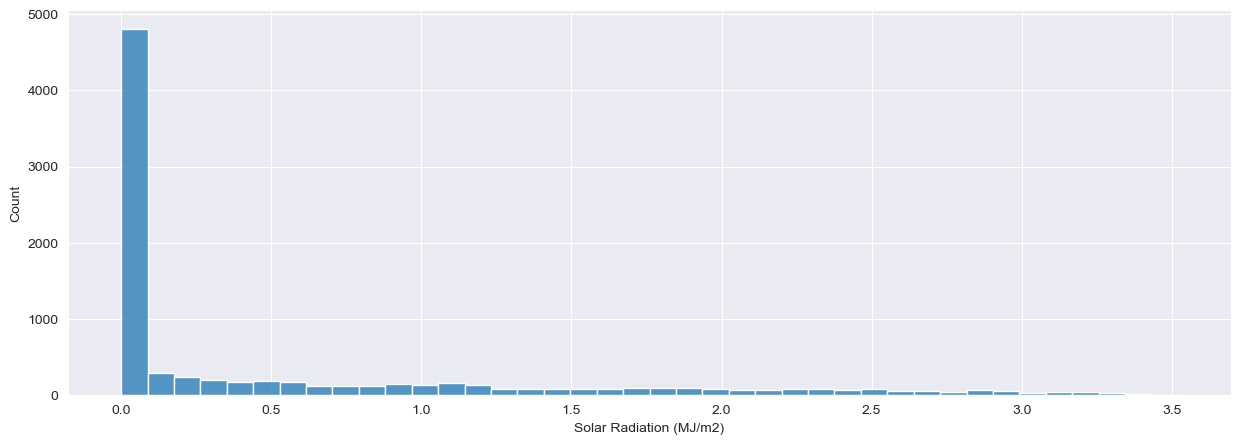

count    8760.000000
mean        0.569111
std         0.868746
min         0.000000
25%         0.000000
50%         0.010000
75%         0.930000
max         3.520000
Name: Solar Radiation (MJ/m2), dtype: float64


In [20]:
sns.histplot(bike_df_og['Solar Radiation (MJ/m2)'])
plt.show()
print(bike_df_og['Solar Radiation (MJ/m2)'].describe())

This histogram further confirms that Solar Radiation (MJ/m2) has an extreme **right** skew distribution. This may also pose a problem but could be fixed by transforming this feature in order to normalize it, the same way as solar radiation.

Both of these features point to the general climate of the location this data was collected in, Seoul, which we can proceed 2 ways:

 * **Keep these features to predict the amount of bikes rented per hour, in Seoul.**
 * **Remove or transform these features to generalize the data.**
 
We think it's best to keep the features and predict for only Seoul as the data is perfect for it.

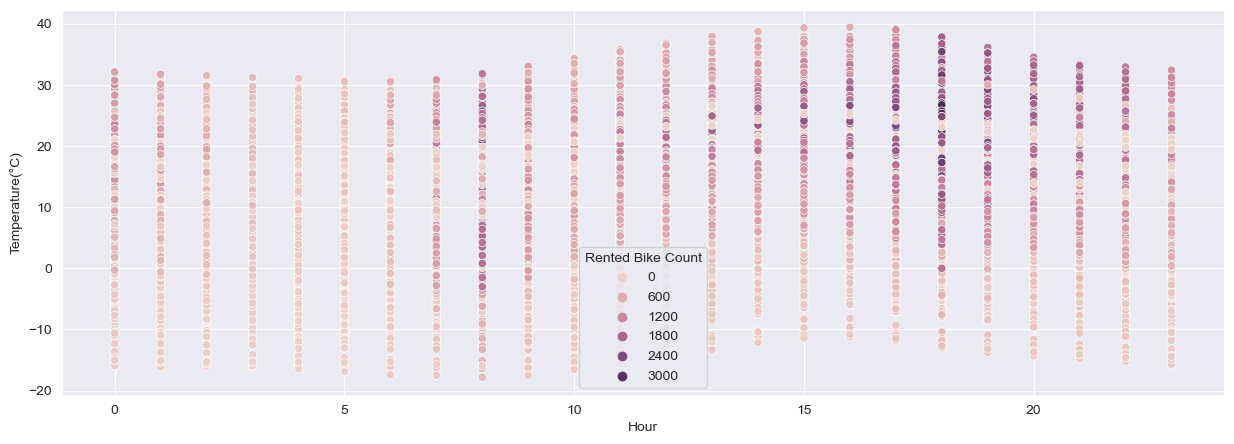

In [21]:
sns.scatterplot(x=bike_df_og['Hour'], y=bike_df_og['Temperature(°C)'], hue='Rented Bike Count', data=bike_df_og)
plt.show()

This scatterplot gives us a better idea on bike rental trends throughout the day, during the later times in the afternoon along with higher temperatures, more bikes are rented. If the temperature is lower, more bikes will be rented earlier in the day. 

## Part 2: Visual Analysis (Categorical)

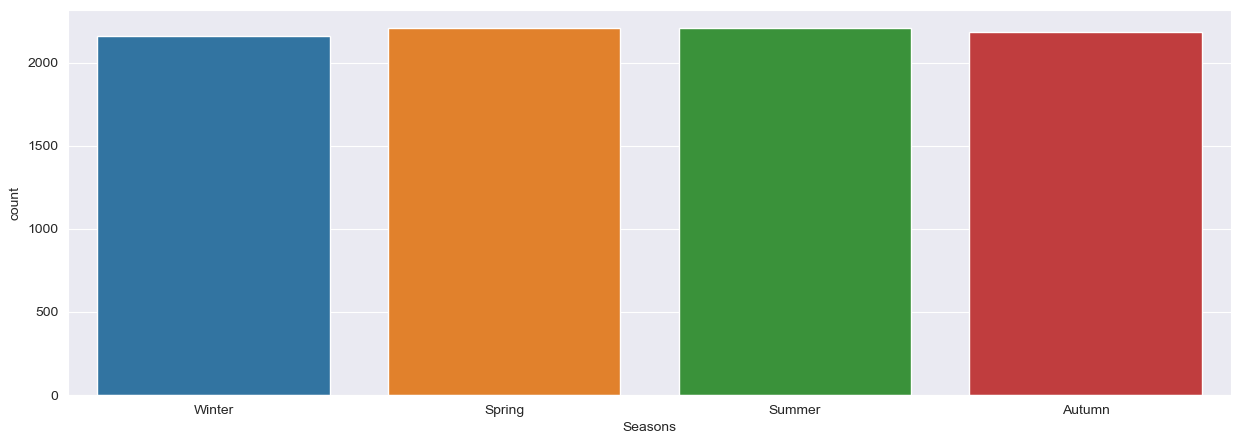

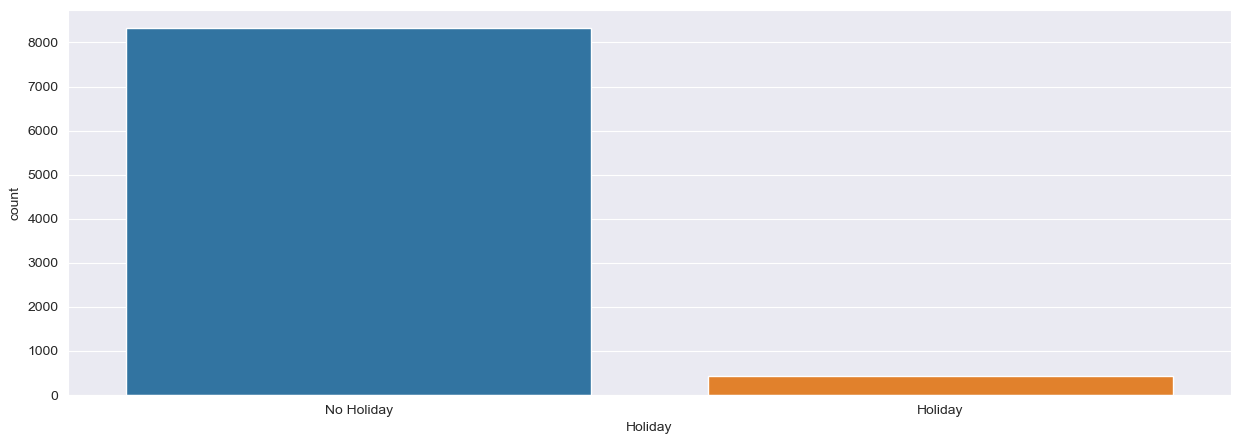

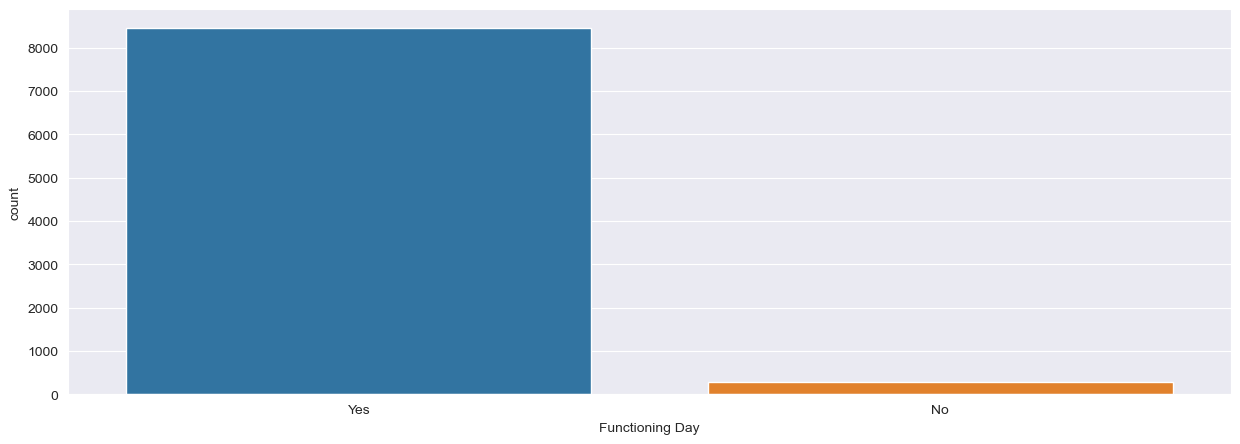

In [22]:
for i, explanatoryVariables in enumerate(bike_df_og[ogCategoricals], 1):
    sns.countplot(x = explanatoryVariables, data = bike_df_og[ogCategoricals])
    plt.show()

Based on the countplots,
 * Distribution uniformed on the seasons reported
 * Distribution disparity on holiday with more on no holiday which makes sense

In [23]:
print(f"Holiday: {bike_df_og['Holiday'].unique()}")
print(bike_df_og['Holiday'].value_counts())
print()

Holiday: ['No Holiday' 'Holiday']
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64



In [24]:
holidayFunc = len(bike_df_og[(bike_df_og['Holiday'] == 'Holiday') & (bike_df_og['Functioning Day'] == 'Yes')])
print("\nThe total number of days on a holiday that is a functioning day: ", holidayFunc)

holidayNoFunc = len(bike_df_og[(bike_df_og['Holiday'] == 'Holiday') & (bike_df_og['Functioning Day'] == 'No')])
print("\nThe total number of days on a holiday that is a NOT functioning day: ", holidayNoFunc)

noHolidayFunc = len(bike_df_og[(bike_df_og['Holiday'] == 'No Holiday') & (bike_df_og['Functioning Day'] == 'Yes')])
print("\nThe total number of days NOT on a holiday that is a functioning day: ", noHolidayFunc)

noHolidayNoFunc = len(bike_df_og[(bike_df_og['Holiday'] == 'No Holiday') & (bike_df_og['Functioning Day'] == 'No')])
print("\nThe total number of days NOT on a holiday that is NOT a functioning day: ", noHolidayNoFunc)


The total number of days on a holiday that is a functioning day:  408

The total number of days on a holiday that is a NOT functioning day:  24

The total number of days NOT on a holiday that is a functioning day:  8057

The total number of days NOT on a holiday that is NOT a functioning day:  271


In [25]:
bike_df_summary = bike_df_og.groupby('Holiday').mean()
bike_df_summary

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
Holiday                                                             
Holiday            499.756944  11.5         9.949769    53.731481   
No Holiday         715.228026  11.5        13.035074    58.459414   

            Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
Holiday                                                                     
Holiday             1.829630       1521.680556                   0.245833   
No Holiday          1.719476       1432.424111                   4.272382   

            Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
Holiday                                                           
Holiday                    0.549745      0.078009       0.050926  
No Holiday                 0.570115      0.152354       0.076321

In [26]:
bike_df_summary = bike_df_og.groupby('Functioning Day').mean()
bike_df_summary

Rented Bike Count       Hour  Temperature(°C)  Humidity(%)  \
Functioning Day                                                               
No                        0.000000  11.298305        16.092881    60.494915   
Yes                     729.156999  11.507029        12.771057    58.147194   

                 Wind speed (m/s)  Visibility (10m)  \
Functioning Day                                       
No                       1.696949       1521.542373   
Yes                      1.725883       1433.873479   

                 Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Functioning Day                                                       
No                                7.770169                 0.604780   
Yes                               3.944997                 0.567868   

                 Rainfall(mm)  Snowfall (cm)  
Functioning Day                               
No                   0.136271       0.000000  
Yes                  0.149120       0.077685

Since the distribution for functioning day and holiday are similar in terms of distribution and dataset description, functioning day is dropped as previously done in the early section of the assignment.


In [27]:
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0               0               0               0               1   
1               0               0               0               1   
2               0               0               0               1   
3               0               0               0               1   
4               0               0               0               1   

   Holiday_Holiday  Holiday_No Holiday  
0                0                   1  
1                0                   1  
2                0                   1  
3                0                   1  
4                0                   1

## Part 3: Data Cleaning

As discovered in the EDA, there are no null/missing values. Furthermore the features that have been dropped were date, functioning day, and Dew Point Temperature. Next, the remaining categorical variables were dummied instead of label encoded to make sure that unique categries were unordered and have equal weight.   

Then since, this dataset contains most features that are not normally distributed and with some outliers RobustScaler was applied. 

In [28]:
from sklearn.preprocessing import RobustScaler
bike_df_min = bike_df.copy()

# Perform min-max scaling on the column/features
scaler = RobustScaler()
scaled = scaler.fit_transform(bike_df)

bike_df = pd.DataFrame(scaled, columns=bike_df.columns)

bike_df[['Rented Bike Count', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)']].describe()

Rented Bike Count  Wind speed (m/s)  Visibility (10m)  \
count        8760.000000       8760.000000       8760.000000   
mean            0.228884          0.160649         -0.246391   
std             0.737772          0.740214          0.573867   
min            -0.577066         -1.071429         -1.576415   
25%            -0.358593         -0.428571         -0.715094   
50%             0.000000          0.000000          0.000000   
75%             0.641407          0.571429          0.284906   
max             3.490420          4.214286          0.284906   

       Solar Radiation (MJ/m2)  
count              8760.000000  
mean                  0.601194  
std                   0.934136  
min                  -0.010753  
25%                  -0.010753  
50%                   0.000000  
75%                   0.989247  
max                   3.774194

In [29]:
#this was unused in the final project.
from sklearn.preprocessing import MinMaxScaler

# Perform min-max scaling on the column/features
scalerM = MinMaxScaler()
scaledM = scalerM.fit_transform(bike_df_min)

bike_df_min = pd.DataFrame(scaled, columns=bike_df.columns)

bike_df_min[['Rented Bike Count', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)']].describe()

Rented Bike Count  Wind speed (m/s)  Visibility (10m)  \
count        8760.000000       8760.000000       8760.000000   
mean            0.228884          0.160649         -0.246391   
std             0.737772          0.740214          0.573867   
min            -0.577066         -1.071429         -1.576415   
25%            -0.358593         -0.428571         -0.715094   
50%             0.000000          0.000000          0.000000   
75%             0.641407          0.571429          0.284906   
max             3.490420          4.214286          0.284906   

       Solar Radiation (MJ/m2)  
count              8760.000000  
mean                  0.601194  
std                   0.934136  
min                  -0.010753  
25%                  -0.010753  
50%                   0.000000  
75%                   0.989247  
max                   3.774194

Before moving onto applying different regression models in this dataset, it is split into a 70/30 train-test split

## Part 4: Regression Models

In [30]:
#splitting the data into training and testing sets, testing size will be .3
from sklearn.model_selection import train_test_split

X = bike_df[['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)',  'Visibility (10m)',
        'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons_Autumn','Seasons_Spring', 'Seasons_Summer','Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday']]
y = bike_df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### KNN Regression

In [31]:
from sklearn.neighbors import KNeighborsRegressor

print("Outputting the KNN_KNeighborsRegressor test data accuracy score for different Ks\n")

test_scores = []
train_scores = []

for i in range(2,25):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train,y_train)
    
    kValTrain = knn.score(X_train, y_train)
    train_scores.append(kValTrain)
    
    kValTest = knn.score(X_test,y_test)
    test_scores.append(kValTest)
    
    #train_scores.append(knn.score(X_train,y_train))
    print("k = " + str(i) + "   " + "Train Accuracy = " + str(round(kValTrain, 3)) + "    Test Accuracy = " + str(round(kValTest, 3)))

Outputting the KNN_KNeighborsRegressor test data accuracy score for different Ks

k = 2   Train Accuracy = 0.876    Test Accuracy = 0.66
k = 3   Train Accuracy = 0.84    Test Accuracy = 0.677
k = 4   Train Accuracy = 0.81    Test Accuracy = 0.688
k = 5   Train Accuracy = 0.79    Test Accuracy = 0.687
k = 6   Train Accuracy = 0.775    Test Accuracy = 0.689
k = 7   Train Accuracy = 0.763    Test Accuracy = 0.689
k = 8   Train Accuracy = 0.753    Test Accuracy = 0.69
k = 9   Train Accuracy = 0.743    Test Accuracy = 0.688
k = 10   Train Accuracy = 0.737    Test Accuracy = 0.688
k = 11   Train Accuracy = 0.73    Test Accuracy = 0.685
k = 12   Train Accuracy = 0.727    Test Accuracy = 0.684
k = 13   Train Accuracy = 0.721    Test Accuracy = 0.679
k = 14   Train Accuracy = 0.717    Test Accuracy = 0.679
k = 15   Train Accuracy = 0.711    Test Accuracy = 0.678
k = 16   Train Accuracy = 0.708    Test Accuracy = 0.674
k = 17   Train Accuracy = 0.705    Test Accuracy = 0.672
k = 18   Train Accur

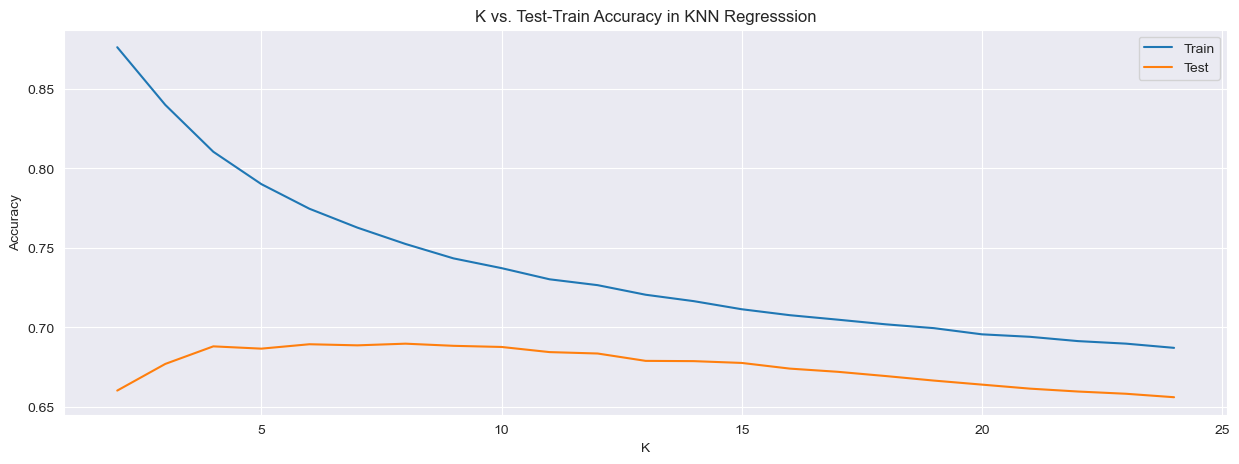

In [32]:
sns.lineplot(x = range(2,25), y = train_scores, label = 'Train')
sns.lineplot(x = range(2,25), y = test_scores, label = 'Test')
plt.title('K vs. Test-Train Accuracy in KNN Regresssion')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [33]:
print(max(train_scores))
print("Maximum Index position: ", (train_scores.index(max(train_scores))) + 2) 

0.8761974177369042
Maximum Index position:  2


In [34]:
print(max(test_scores))
print("Maximum Index position: ", (test_scores.index(max(test_scores))) + 2) 

0.689825714992144
Maximum Index position:  8


Although k = 2 is best for the training set, it is possible that it may have been overfitting the training set. It is likely that a k = 2 KNN Regressor model will not have good generalization for the testing set. Before using k = 2 for the model, it is important to hypertune parameters with cross validation before implementing the final model.

In [35]:
from sklearn.model_selection import GridSearchCV

#weights = ['uniform', 'distance']
#algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
#metric = ['manhattan', 'cosine', 'euclidean', 'minkowski ']
#n_neighbors = n_neighbors, weights = weights, algorithm = algorithm, leaf_size = leaf_size, p = p, metric = metric 

n_neighbors = list(range(1, 15))
leaf_size = list(range(1, 30))
p = [1,2]


hypertunedParameters = dict(n_neighbors = n_neighbors, leaf_size = leaf_size, p = p)

knn_validated = KNeighborsRegressor()

clf = GridSearchCV(knn_validated, hypertunedParameters, cv = 5)

best_model = clf.fit(X_train, y_train)

print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best metric:', best_model.best_estimator_.get_params()['metric'])
#print('Best weights:', best_model.best_estimator_.get_params()['weights'])
#print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 7
Best leaf_size: 1
Best p: 1


commented out are the other parameters that can be hypertuned. However, it was removed because this dataset is large and would require possibly a day or a week to complete the cross validation. 

In [36]:
# Without cross validation and hypertuning

knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train, y_train)
kValTrain = knn.score(X_train, y_train)
print("n_neighbors = 2")
print(f'Accuracy: {kValTrain}')


kValTest = knn.score(X_test, y_test)
print("n_neighbors = 6")
print(f'Accuracy: {kValTest}')

n_neighbors = 2
Accuracy: 0.8761974177369042
n_neighbors = 6
Accuracy: 0.6603389056589413


In [72]:
knn = KNeighborsRegressor(n_neighbors = 7, leaf_size = 1, p = 1)
knn.fit(X_train, y_train)
kValTrain = knn.score(X_train, y_train)
print("n_neighbors = 6")
print(f'Accuracy: {kValTrain}')

kValTest = knn.score(X_test, y_test)
print("n_neighbors = 6")
print(f'Validated Accuracy: {kValTest}')

n_neighbors = 6
Accuracy: 0.7815196996394991
n_neighbors = 6
Validated Accuracy: 0.7128766488322851


As predicted, choosing the n_neighbors as 2 by default based on the initial accuracy score and **without cross validation + hypertuning** led to a  lower accuracy score. 

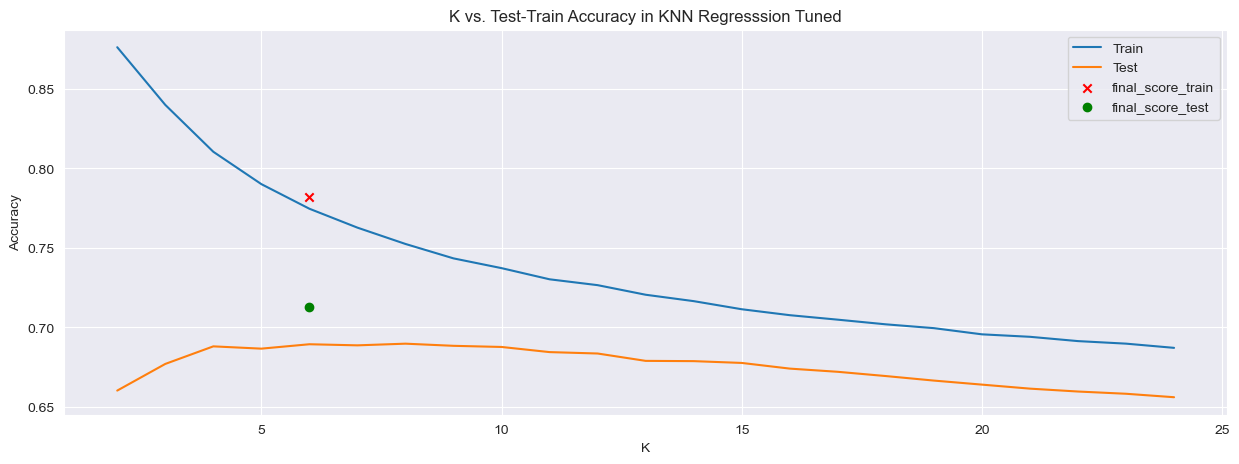

In [73]:
sns.lineplot(x = range(2,25), y = train_scores, label = 'Train')
sns.lineplot(x = range(2,25), y = test_scores, label = 'Test')
plt.scatter(6, 0.782, marker='x', color = "red", label = 'final_score_train')
plt.scatter(6, 0.713, marker='o', color = "green", label = 'final_score_test')
plt.title('K vs. Test-Train Accuracy in KNN Regresssion Tuned')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
import math

predictedVals = knn.predict(X_test)

score = knn.score(X_test, y_test)
print("Best Accuracy score:", score)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictedVals))

mse = mean_squared_error(y_test, predictedVals)
print("Mean Squared Error:", mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Best Accuracy score: 0.7128766488322851
Mean Absolute Error: 0.25681553654258243
Mean Squared Error: 0.16253769459798154
Root Mean Squared Error: 0.40315963909843644


In [75]:
halfLength = len(y_test) // 2
first_y_test = y_test[:halfLength]
second_y_test = y_test[halfLength:]

first_predictedVals = predictedVals[:halfLength]
second_predictedVals = predictedVals[halfLength:]

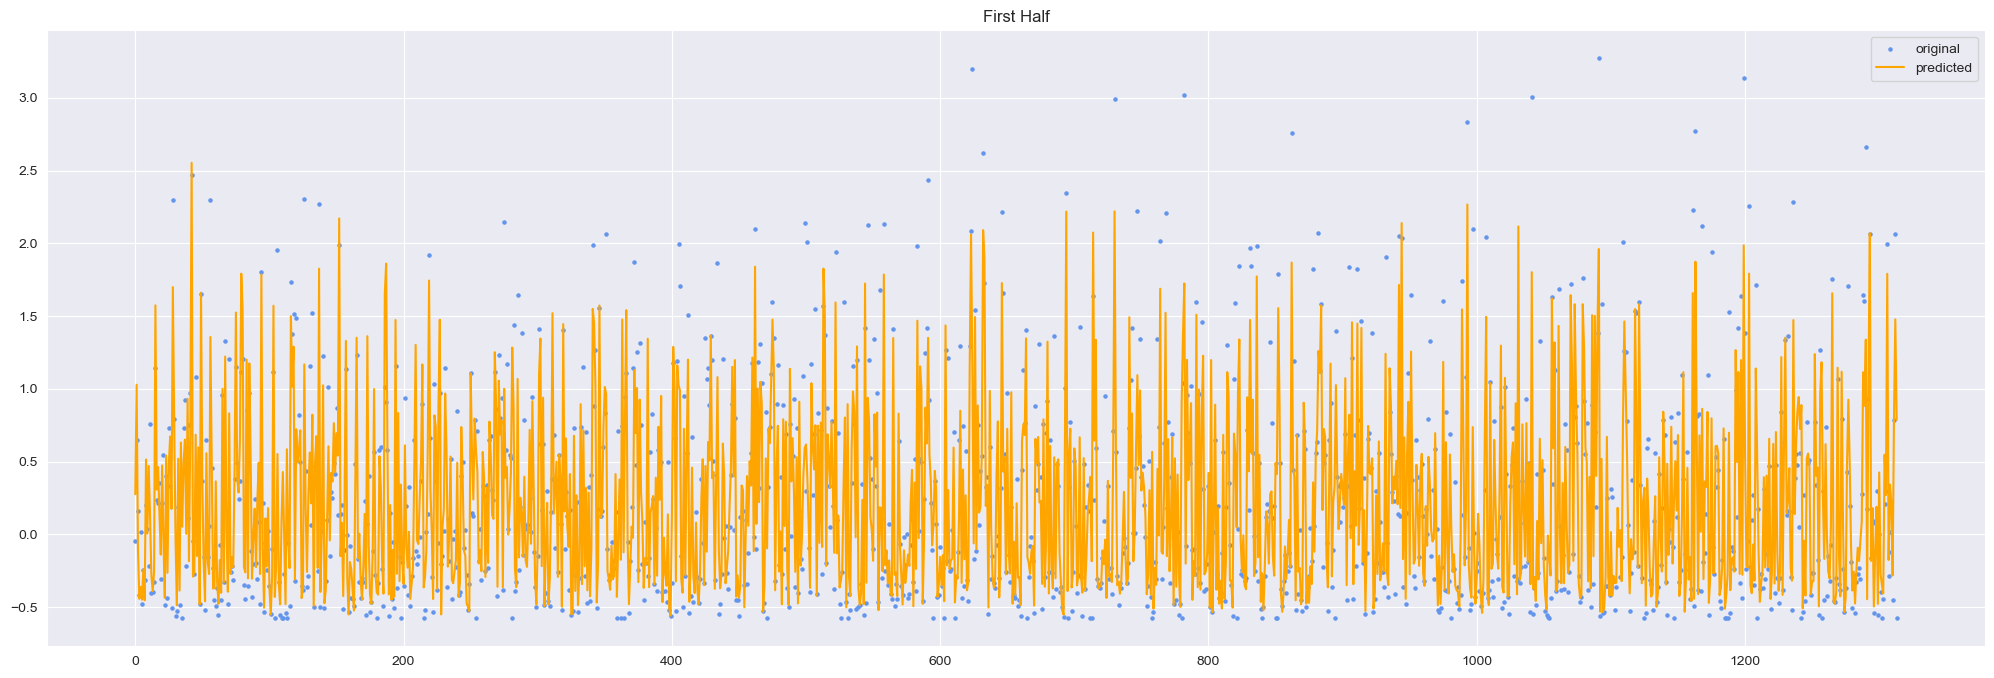

In [76]:
# Create a larger plot with a size of 12x8 inches
fig, ax = plt.subplots(figsize = (25, 8))

# Plot the data with the larger plot size
x_ax = range(1314)

ax.scatter(x_ax, first_y_test, s = 5, color = "cornflowerblue", label = "original")
ax.plot(x_ax, first_predictedVals, lw = 1.5, color = "orange", label = "predicted")
ax.legend()
plt.title("First Half")
plt.show()

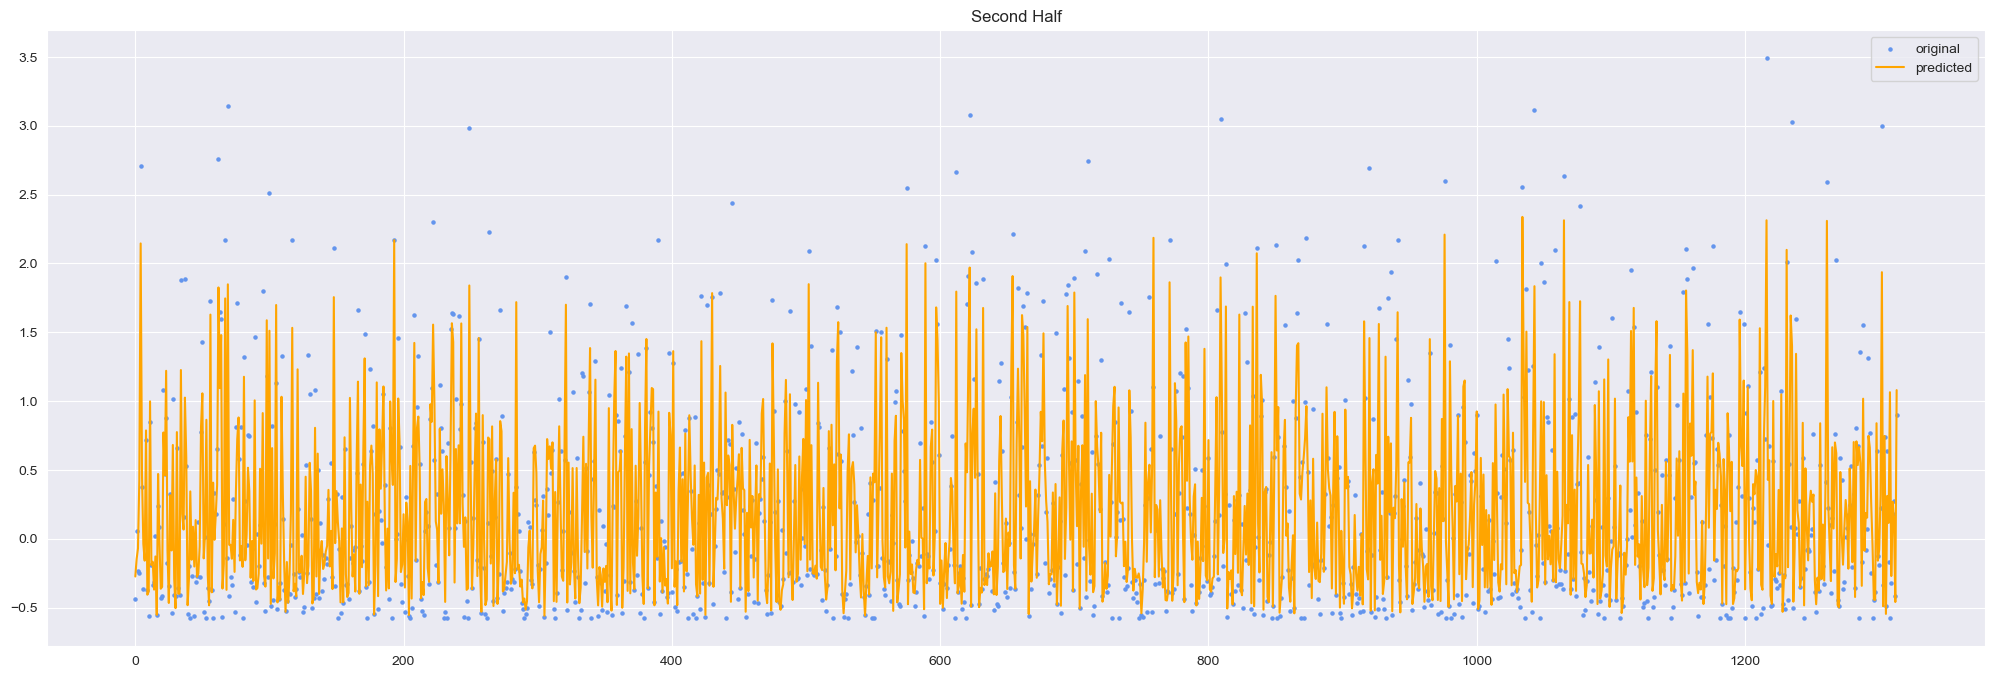

In [77]:
# Create a larger plot with a size of 12x8 inches
fig, ax = plt.subplots(figsize=(25, 8))

# Plot the data with the larger plot size
x_ax = range(1314)

ax.scatter(x_ax, second_y_test, s = 5, color = "cornflowerblue", label = "original")
ax.plot(x_ax, second_predictedVals, lw = 1.5, color = "orange", label = "predicted")
ax.legend()
plt.title("Second Half")
plt.show()

It is important to address that the inner workings of KNN does not calculate coefficient weights unlike Linear Regression. KNN instead calculates the distances between the dataset samples. With that in mind, it is best to apply permutation feature importance instead  


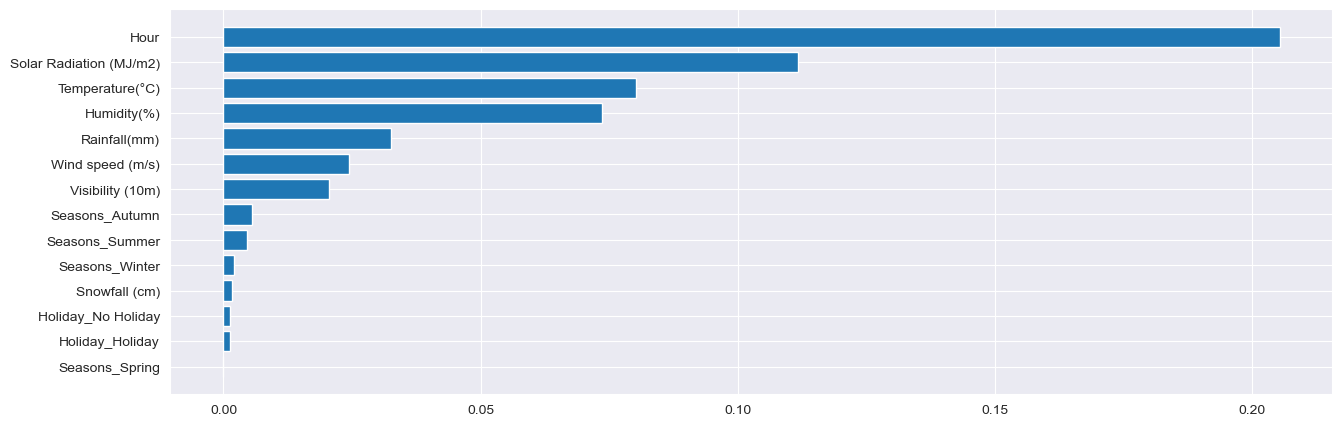

In [79]:
from sklearn.inspection import permutation_importance

results = permutation_importance(knn, X_test, y_test, scoring='neg_mean_squared_error')
importance = results.importances_mean

features = X_train.columns

f_i = list(zip(features, importance))

f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()


Overall, the best performing model for the KNN Regressor is to have hypertuned n_neighbors = 10, leaf_size = 1, p = 1 that was cross validated 5 times. In terms of the most important features, Hour, Solar Radiation, Temperature, and Humidity were the most important. It does echo the same findings from the initial EDA found evaluating the correlation matrix. It is important to note that there are other parameters that can be used to hypertune like weight, algorithm, and metric.

### Linear, Lasso, and Ridge Regression

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [48]:
#Fit each model accordingly with X_train and y_train
#Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
#Lasso Regression model
#lasso = Lasso(alpha = 0.05, normalize = True)
lasso = Lasso(alpha = 0.05)
lasso.fit(X_train, y_train)
predictions_lasso = lasso.predict(X_test)
#Ridge Regression model
#ridge = Ridge(alpha=0.05, normalize=True)
ridge = Ridge(alpha=0.05)
ridge.fit(X_train, y_train)
predictions_ridge = ridge.predict(X_test)

In [49]:
print('Accuracy scores for each Model (MAE, MSE, RMSE, R2)')
print("\n\n")
print("Linear Model Scores")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))
print("\n\n")
print("Lasso Model Scores")
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso)))
print('R2 Score: ', r2_score(y_test, predictions_lasso))
print("\n\n")
print("Ridge Model Scores")
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))
print('R2 Score: ', r2_score(y_test, predictions_ridge))

Accuracy scores for each Model (MAE, MSE, RMSE, R2)



Linear Model Scores
MAE: 0.39616235266734484
MSE: 0.2939348469986921
RMSE: 0.5421575850236646
R2 Score:  0.4807631638680686



Lasso Model Scores
MAE: 0.4135809368628299
MSE: 0.3284647333151581
RMSE: 0.573118428699652
R2 Score:  0.41976601056682417



Ridge Model Scores
MAE: 0.3961617122299137
MSE: 0.29393500035739645
RMSE: 0.5421577264573442
R2 Score:  0.48076289295943275


In [56]:
#Lastly, let's just show our coefficients
#Linear Regression Coefficients
pd.DataFrame(zip(X.columns, lm.coef_))

0         1
0                      Hour  0.366810
1           Temperature(°C)  0.533579
2               Humidity(%) -0.298820
3          Wind speed (m/s)  0.021830
4          Visibility (10m)  0.012217
5   Solar Radiation (MJ/m2) -0.080173
6              Rainfall(mm) -0.061578
7             Snowfall (cm)  0.052500
8            Seasons_Autumn  0.101918
9            Seasons_Spring  0.051553
10           Seasons_Summer  0.078157
11           Seasons_Winter -0.231628
12          Holiday_Holiday -0.070711
13       Holiday_No Holiday  0.070711

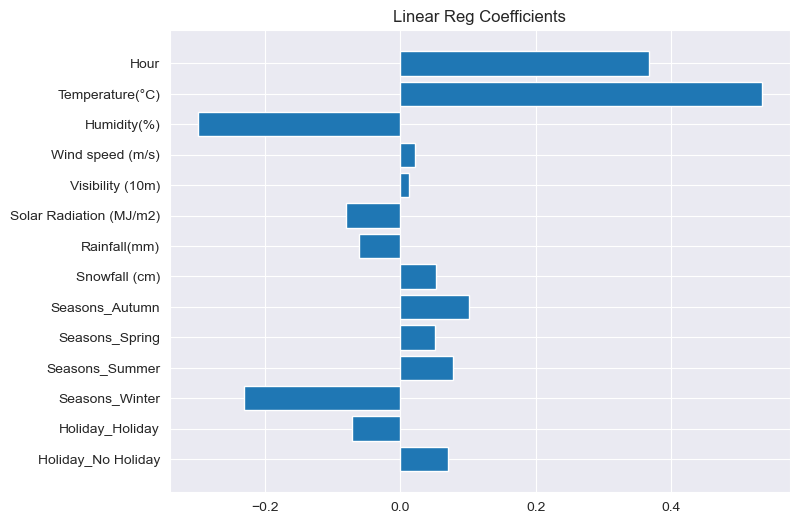

In [71]:
data = []
for i in range (len(X_train.columns)):
    data.append([X_train.columns[i], lm.coef_[i], lasso.coef_[i],
               ridge.coef_[i]]) 

df = pd.DataFrame(data, columns=[ 'features', 'Linear Reg', 'Lasso Reg', 'Ridge Reg'])

df

fig, ax = plt.subplots(figsize=(8, 6))
y = np.arange(len(df))

ax.barh(y, df['Linear Reg'])
ax.set_yticks(y)
ax.set_yticklabels(df['features'])
ax.invert_yaxis() 
ax.set_title('Linear Reg Coefficients')

plt.show()

In [58]:
#Lasso Coefficients
pd.DataFrame(zip(X.columns, lasso.coef_))

0         1
0                      Hour  0.271413
1           Temperature(°C)  0.495628
2               Humidity(%) -0.105876
3          Wind speed (m/s)  0.000000
4          Visibility (10m)  0.000000
5   Solar Radiation (MJ/m2)  0.000000
6              Rainfall(mm) -0.037970
7             Snowfall (cm) -0.000000
8            Seasons_Autumn  0.000000
9            Seasons_Spring  0.000000
10           Seasons_Summer  0.000000
11           Seasons_Winter -0.000000
12          Holiday_Holiday -0.000000
13       Holiday_No Holiday  0.000000

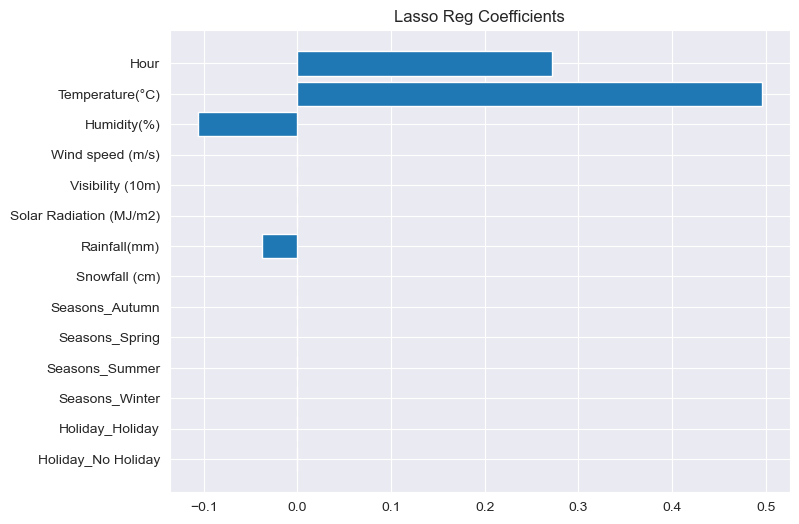

In [69]:
data = []
for i in range (len(X_train.columns)):
    data.append([X_train.columns[i], lm.coef_[i], lasso.coef_[i],
               ridge.coef_[i]]) 

df = pd.DataFrame(data, columns=[ 'features', 'Linear Reg', 'Lasso Reg', 'Ridge Reg'])

df

fig, ax = plt.subplots(figsize=(8, 6))
y = np.arange(len(df))

ax.barh(y, df['Lasso Reg'])
ax.set_yticks(y)
ax.set_yticklabels(df['features'])
ax.invert_yaxis() 
ax.set_title('Lasso Reg Coefficients')

plt.show()

In [59]:
#Ridge Coefficients
pd.DataFrame(zip(X.columns, ridge.coef_))

0         1
0                      Hour  0.366808
1           Temperature(°C)  0.533546
2               Humidity(%) -0.298797
3          Wind speed (m/s)  0.021829
4          Visibility (10m)  0.012226
5   Solar Radiation (MJ/m2) -0.080159
6              Rainfall(mm) -0.061579
7             Snowfall (cm)  0.052490
8            Seasons_Autumn  0.101915
9            Seasons_Spring  0.051551
10           Seasons_Summer  0.078170
11           Seasons_Winter -0.231636
12          Holiday_Holiday -0.070705
13       Holiday_No Holiday  0.070705

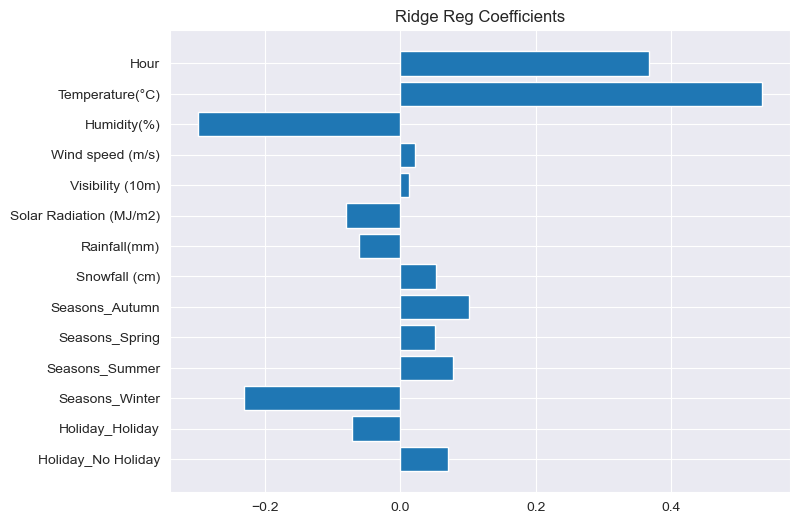

In [63]:
data = []
for i in range (len(X_train.columns)):
    data.append([X_train.columns[i], lm.coef_[i], lasso.coef_[i],
               ridge.coef_[i]]) 

df = pd.DataFrame(data, columns=[ 'features', 'Linear Reg', 'Lasso Reg', 'Ridge Reg'])

df

fig, ax = plt.subplots(figsize=(8, 6))
y = np.arange(len(df))

ax.barh(y, df['Ridge Reg'])
ax.set_yticks(y)
ax.set_yticklabels(df['features'])
ax.invert_yaxis() 
ax.set_title('Ridge Reg Coefficients')

plt.show()

Here we run three different regression models with train test splits of 0.3, and predict based off of our X_test set. The above scores correspond to the individual model's MAE, MSE, RMSE, and R^2 scores. Both Linear and Ridge regression models performed similarly. Both have similar MAE, MSE, and RMSE scores which means the average difference between predicted values and actual values were in the same ranges between both. These two models both received similar R^2 values in the range of ~0.45 to 0.5. The Lasso regression model performed the worst of the 3 by a large margin. For the Linear and Ridge regression models, we can attribute ~45-50% of the variance of the set to be explained by the model, while in the Lasso we can predict ~60% of the variance to be outside the bounds of the regression model.

As for what this means for our data set? In the case of our dataset (or predicting the amount of bikes rented based on all the given factors), Ridge regression makes the most sense to use for our modeling as we have a lot of different variables that all impact rentals. Likewise, our ridge regression model accounts for 50% of the variance. When predicting something as whether or not a person will rent a bike, there are at times many things we could not account for that is not included in the data set. For instance we are given the temperatures and seasons as well as whether there is a workday occuring. This does not account for other factors such as major events occuring in Seoul that may not be tied to holidays, upcoming media events on television/internet/etc, or other events that while not directly related; can still directly impact the outcome of bike rentals.

So finally, let's look at the models themselves. Ridge and Linear regression both focus on the same categories: [Hour, Temperature, Humidity, and Seasons_Winter] , while Lasso Regression focuses mainly on [Hour, Temperature and Humidity/Rain]. For Hour, Temperature, and Humidity all three models have similar approaches. Hour and Temperature both have positive coefficients while Humidity has a negative coefficient. We can assume based solely on the model that as the the temperature and hour go up, people are more prone to rent bikes; while if the day is rainy or humid, people are less likely to rent bikes (and who can blame them? It's nicer to ride a bike on a nice sunny afternoon than a cold, rainy morning). Now for some more interesting tidbits, in Ridge and Linear regression, Season_Winter has a big negative coefficient; meaning if it is winter, people are less likely to rent out bikes. This tracks as winter tends to be characterized by colder weather. 

### Random Forest

In [50]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#lists for the 2 scores
mses = []
r2s = []

#make a random forest for each max depth and cross validate
for max_depth in range(5, 25): #searches through max depths of 5 to 25
    rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=50)
    #cross validation
    cv = cross_validate(rf, X_train, y_train, cv=5, scoring=('neg_mean_squared_error', 'r2'))
    #calculating scores
    r2s.append(np.mean(cv['test_r2']))
    mses.append(-np.mean(cv['test_neg_mean_squared_error']))

In [51]:
#Printing out every single depth score
print("R2 Scores")
for ind, i in enumerate(r2s):
    print(f'{ind + 2}: {i}')
#Mistake in output, second R2 is meant to be MSES scores.
print("\nMSES Scores")
for ind,i in enumerate(mses):
    print(f'{ind + 2}: {i}')

R2 Scores
2: 0.6959009486454786
3: 0.7267759858359251
4: 0.7440180568607291
5: 0.754486119099836
6: 0.761521777509885
7: 0.7662069525141344
8: 0.7685571451173375
9: 0.7696346594166267
10: 0.7701932783952457
11: 0.7706262218267994
12: 0.7710831077302076
13: 0.7706694161848539
14: 0.7710324108060665
15: 0.7713310453722416
16: 0.7703764046788146
17: 0.7705575623388503
18: 0.7715612911119496
19: 0.7703179503165587
20: 0.7708074194104915
21: 0.7704804184701279

R2 Scores
2: 0.16253861458691315
3: 0.1460234020009386
4: 0.13680404455379833
5: 0.13121300238775307
6: 0.1274512855790473
7: 0.12494594419178846
8: 0.12368236678400643
9: 0.12310688083796095
10: 0.1228056174585892
11: 0.12257626686730458
12: 0.12233061237660355
13: 0.12255043754060435
14: 0.12235932822683035
15: 0.12219649733585543
16: 0.12270663792776686
17: 0.12261642037520841
18: 0.12207700522193518
19: 0.12273980082045104
20: 0.12247668824033656
21: 0.1226543178048187


In [53]:
#lowest mse and highest r2 
maxs = range(5,25)
mse_depth = maxs[np.argmin(mses)]
r2_depth = maxs[np.argmax(r2s)]
print('Best depth with mse- ', mse_depth)
print('Best depth with r2- ', r2_depth)

Best depth with mse-  21
Best depth with r2-  21


In [54]:
import math

#make the model with the best max depth (based on r2)
top_rf = RandomForestRegressor(n_estimators=100, max_depth=r2_depth, random_state=50)
top_rf.fit(X_train, y_train)

#evaluation
y_pred = top_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R^2 score:", r2)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print("Mean Squared Error:", mse)

rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R^2 score: 0.7819199737500595
Mean Absolute Error: 0.205147821273495
Mean Squared Error: 0.12345294996166202
Root Mean Squared Error: 0.35135871977462296


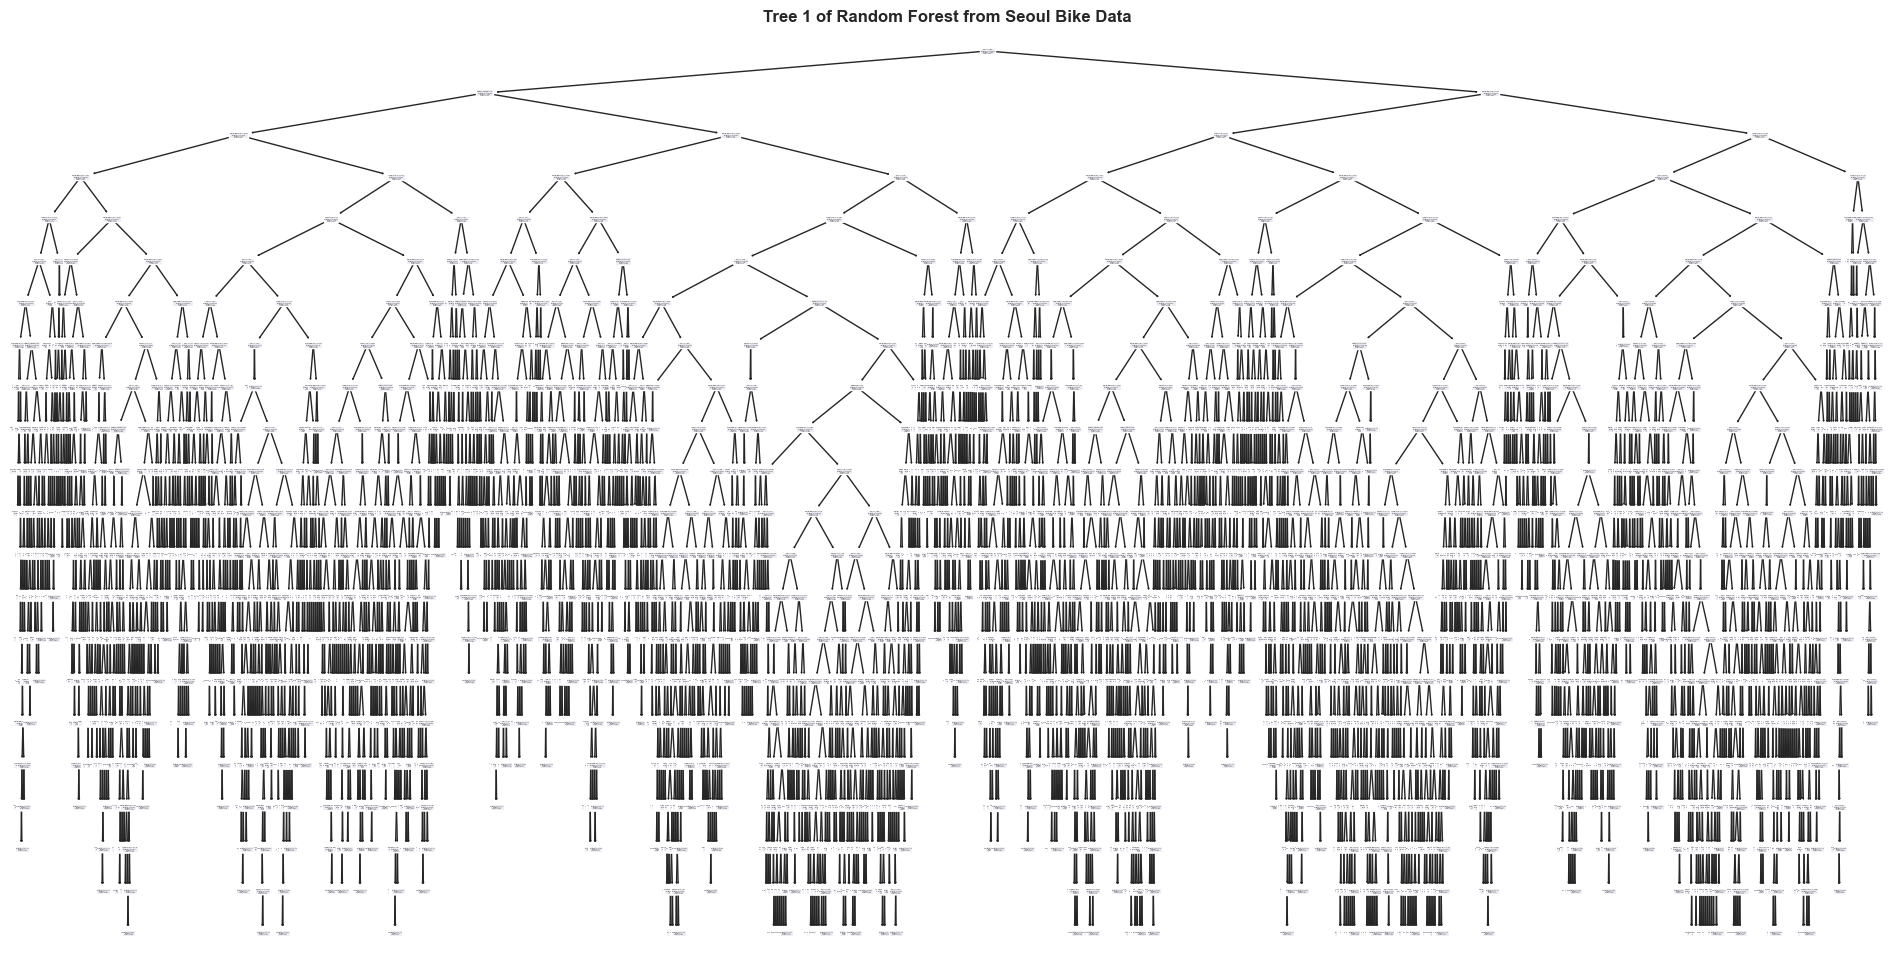

In [55]:
from sklearn.tree import plot_tree

#plotting the first tree in the forest for a visualization
fig, ax = plt.subplots(figsize = (24, 12))
plot_tree(top_rf.estimators_[0], feature_names = bike_df.columns, ax = ax)
plt.title('Tree 1 of Random Forest from Seoul Bike Data', fontweight='bold')
plt.show()

In [ ]:
#seeing what features affect the forest the most
cols = X_train.columns #feature names
feats = top_rf.featureimportances #importances

#making a series to display
forest_importances = pd.Series(feats, index=feature_names)
forest_importances.sort_values(ascending=False)

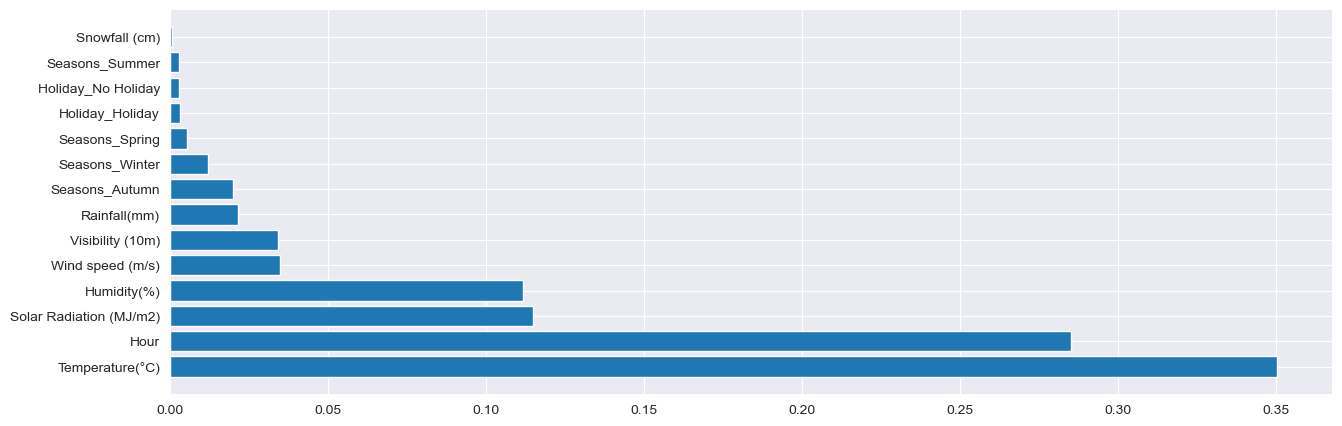

In [68]:
from sklearn.feature_selection import RFECV

features = X_train.columns

f_i = list(zip(features, top_rf.feature_importances_))
f_i.sort(key = lambda x : x[1], reverse = True)
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

### Final Report

### <u>EDA</u>

The goal of this assignment is to predict the bike count required at each hour for the stable supply of rental bikes in Seoul. Before modeling, it is essential to explore the dataset by evaluating the distribution of the data, understanding relationships between quality vs. other explanatory variables, and addressing issues like collinearity. The ‘SeoulBikeData.csv’ has 8760 entries with no missing/null values, 10 features are numerical (e.g., float64 & int64), and 4 are categorical (e.g., object). It is likely that the categorical features are going to be either dropped or hot-encoded since this is a regression focused analysis to the dataset. In terms of data visualization, pairplots, heatmap, histograms, boxplots, scatterplots, histplot, and countplots were used. Histogram and boxplot showcase that most numerical features in the dataset are skewed and have outliers. Pairplots and heatmap reveals that Hour, Temperature, and Solar Radiation are likely to predict the bike count required due to its strong positive correlation to rented bike count. Meanwhile, Humidity has the strongest negative correlation to rented bike count. Heatmap also reveals one collinearity between temperature and Dew Point. Since temperature has a higher correlation with rented bike count it is going to be kept while Dew Point is dropped. Next, a scatterplot was visualized with Hour and Temperature with Rented Bike Count as the hue to revels that more bikes were rented between 15 – 20 hour and 10 – 40 degrees Celsius. Lastly, countplots revealed that there is a equal distribution between seasons while holiday and functioning day had a similar distribution.  

### <u>Data Cleaning</u>

The following process after exploring the dataset is data cleaning. The data cleaning process implies applying various techniques to address issues discovered during the exploration phase. As discovered, this dataset had no null/missing values and the features dropped based on the EDA were Date, Functioning Day, and Dew Point Temperature. The reason date was dropped was because we wanted to place more empahsis on using seasons as the timeframe. Functioning Day was dropped was because it had a similar distribution to the functioning day and dataset description. Furthermore, Dew Point was dropped because the heatmap revealed a collinearity issue with Temperature. It is important to note that the reason Dew Point was dropped over temperature was because it had a higher correlation with the response variable. The following steps once removing features were making the remaining categorical variables into dummies. The reason dummies was applied over label encoding was that we wanted to make sure that each unique categories with each categorical feature were unordered and have equal weight. Lastly, RobustScaler was applied to the entire dataset before applying regression modeling because most of the features did not have a normal distribution and had numerous outliers. 

### <u>Regression Modeling</u>

After doing EDA and data cleaning, different regression models were used to predict the bike count required at each hour for the stable supply of rental bikes at Seoul, South Korea.

<u>Linear Regression</u>

Here we run three different regression models with train test splits of 0.3, and predict based off of our X_test set. The above scores correspond to the individual model's MAE, MSE, RMSE, and R^2 scores. Both Linear and Ridge regression models performed similarly. Both have similar MAE, MSE, and RMSE scores which means the average difference between predicted values and actual values were in the same ranges between both. These two models both received similar R^2 values in the range of ~0.45 to 0.5. The Lasso regression model performed the worst of the 3 by a large margin. For the Linear and Ridge regression models, we can attribute ~45-50% of the variance of the set to be explained by the model, while in the Lasso we can predict ~60% of the variance to be outside the bounds of the regression model.

As for what this means for our data set? In the case of our dataset (or predicting the amount of bikes rented based on all the given factors), Ridge regression makes the most sense to use for our modeling as we have a lot of different variables that all impact rentals. Likewise, our ridge regression model accounts for 50% of the variance. When predicting something as whether or not a person will rent a bike, there are at times many things we could not account for that is not included in the data set. For instance we are given the temperatures and seasons as well as whether there is a workday occuring. This does not account for other factors such as major events occuring in Seoul that may not be tied to holidays, upcoming media events on television/internet/etc, or other events that while not directly related; can still directly impact the outcome of bike rentals.

So finally, let's look at the models themselves. Ridge and Linear regression both focus on the same categories: [Hour, Temperature, Humidity, and Seasons_Winter] , while Lasso Regression focuses mainly on [Hour, Temperature and Humidity/Rain]. For Hour, Temperature, and Humidity all three models have similar approaches. Hour and Temperature both have positive coefficients while Humidity has a negative coefficient. We can assume based solely on the model that as the the temperature and hour go up, people are more prone to rent bikes; while if the day is rainy or humid, people are less likely to rent bikes (and who can blame them? It's nicer to ride a bike on a nice sunny afternoon than a cold, rainy morning). Now for some more interesting tidbits, in Ridge and Linear regression, Season_Winter has a big negative coefficient; meaning if it is winter, people are less likely to rent out bikes. This tracks as winter tends to be characterized by colder weather. 

<u>Random Forest Regression</u>

RandomForestRegressor from sklearn is an ensemble method of putting together many decision trees to make the best possible model. Random forests are good at working with large data sets with many features, which this dataset has. It's also a robust model which means it is good at handling outliers. This model performed very well with the dataset used. It had a very high R2 score for real world data which makes it a good model to use for predicting the bike count at a given hour. For this model, we used cross validation to compute the max depth of the trees to avoid overfitting model. Once that was done, we analyzed the performance of the model. The random forest explains 78% of the variance in the model, and the error rates were not the worst either, making this a good model for this data. The features that affected this model the most were temperature and hour, which we can see is similar to the other model's results.

This random forest regression model appeared to perform the best most likely due to the huge amount of data recorded that we used. This data also had a lot of variance and no linear relationships which is okay for random forests as it works well with non-linear relationships. From the results, we can infer that people choose to rent bikes mostly depending on what time of day it is in combination with the temperature. Note that this dataset records only the climate in Seoul, so bike rental trends are most likely very different in other parts of the world with different climates. The other models created also pointed to similar conclusions disregarding their performance.

<u>KNN</u>

KNN Regressor is regression model that is easy to interpret, a lazy learning algorithm, and easy to hypertune. However, it is sensitive to outliers and costly with large datasets. The nature of KNN Regressor algorithm is based on calculating the distance and its similarity to the dataset samples. When applying KNN Regressor, the general approach was applying a simple model then hypertuning and cross validating. The simple model entailed only using n_neighbors as the primary parameter and outputting the accuracy score for the train-test split at different n_neighbors. It was discovered that the training set for the simple model had a higher accuracy score at n_neigbors = 2, but the test set had a higher accuracy score at n_neighbors = 8. The disparity in n_neighbors was primarily due to overfitting in the training set and using it as the final n_neighbors would result in bad generalization to unforseen data. The following steps after doing a simple model was hypertuning the model and cross-validating. It was discovered that the best n_neighbors was at 7, leaf size = 1, and p = 1 which resulted in a higher accuracy score and lower RMSE over the simple model. With the final model, applying a feature importance algorithm revealed that hour, solar radiation, and temperature had the most weight. 

Overall, KNN Regressor performed 2nd best likely due to its limited ability to handle a large dataset and sensitivity to outliers. It is important to note that there could have been more parameters to hypertune with cross validation for KNN Regressor. However, this dataset is quite large and incorporating more parameters in hypertuning with cross validation could result in hours possibly weeks to complete. If given time, it may be possible that it can outperform Random Forest. Furthermore, it is important to address that it may be beneficial to re-evaluate by using other scaling techniques such as MinMaxScaler or StandardScaler considering that KNN is a distance based algorithm. 

### <u>Conclusion</u>

All regression models had importance placed on Humidity, Hour, and Temperature. Moving forward, advisable steps for bike-sharing businesses in Seoul is to hone in that more rentals occur at later hours, in warmer temperatures, with low humidity. Dataset could be more in depth by adding variables such as: whether or not rentals are on sale, avg. number of bikes per person [families], day of the week, avg rental hours [how long did a bike stay rented] Ultimately, our findings are only specific to Seoul. It may or may not be the case that other major metropolitan cities with a bike-sharing system can benefit from this study and echo the same findings. With that in mind, it is important to analyze other cities implementing a bike-sharing program as an alternative form of transportation. In doing so, analyzing the bike count that is required at each hour is important to mitigate the downsides of bike-sharing programs. An excess of bikes available is going to lead to more maintenance and repair needed where most of the revenue is lost. 